In [ ]:
import requests
from pprint import pprint
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import numpy as np
import networkx as nx
from collections import defaultdict
from tqdm import tqdm
import json 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import numpy as np
import networkx as nx

from collections import defaultdict
from tqdm import tqdm
# Python program to detect cycle 
# in a graph
  
from networkx.readwrite import json_graph
import json
import seaborn as sns
from nxpd import draw
import trustme
from Trust.pagerank import BL_PPR, PersonalizedPageRank,PersonalizedPageRankNx

from Trust.hitting_time import  BL_PHT, PersonalizedHittingTime
#from Trust.bl_pht import

from Trust.maxflow_based import MaxFlow
from networkx import Graph

In [ ]:
%load_ext autoreload
%autoreload 2
from read_data import *

In [ ]:
def run_query(q):

    # endpoint where you are making the request
    request = requests.post('https://api.thegraph.com/subgraphs/name/f8n/fnd'
                            '',
                            json={'query': q})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, query))

# given a token id return the metadata
def get_metadata(t_id):
    query = """
    {
      nfts(where: {tokenId: \"""" + str(t_id) + """\" }) {
        tokenId
        dateMinted
        creator {
          id
        }
        owner {
          id
        }
        netSalesInETH
        netRevenueInETH
        isFirstSale
        nftHistory {
          event
          date
          amountInETH
          actorAccount {
            id
          }
        }
      }
    }
    """
    try:
        result = run_query(query)
        return result['data']['nfts'][0]
    except Exception as e:
        print(f"Error for token ID {t_id}: {e}")
        print("Response:", result)
        return None

In [ ]:
nft_metadata = {}

### i.e. brute force call all of the minted token ids
for t_id in tqdm(range(0,500)):
    try:
        nft_metadata[t_id] = get_metadata(t_id)
    except:
        continue

In [ ]:
with open('nft_raw_data19.txt', 'w') as outfile:
    json.dump(nft_metadata, outfile)
    

In [ ]:
t = json.load(open('nft_raw_data18.txt','r'))
#t = dict(t)
print("N art minted:", len(list(t.keys())))
#print(t)

In [ ]:
print("Columns in listing_df before selection:", listing_df.columns)

In [ ]:
with open('nft_raw_data18.txt', 'r') as file:
    raw_data_content = file.read()

# Print the raw data and its keys
raw_data = json.loads(raw_data_content)
print("Raw Data:", raw_data)
print("Keys in Raw Data:", raw_data.keys())

In [ ]:
import pandas as pd
print(pd.__version__)

In [ ]:
import tabulate
print(tabulate.__version__)


In [54]:
import pandas as pd
import json

# Load the JSON data
with open('nft_raw_data18.txt', 'r') as file:
    raw_data = json.load(file)

# Initialize an empty list to store 'Listed' event entries
listed_entries = []

# Iterate over each token entry in the JSON data
for token_id, token_data in raw_data.items():
    # Check if token_data is a dictionary and has 'nftHistory'
    if isinstance(token_data, dict) and 'nftHistory' in token_data:
        nft_history_data = token_data.get('nftHistory')
        
        # Iterate over each event in nftHistory
        for entry in nft_history_data:
            # Add 'Listed' events to the listed_entries list
            if entry.get('event') == 'Listed':
                entry['token_id'] = token_id  # Add 'token_id' to the entry
                listed_entries.append(entry)

# Create a DataFrame from the 'Listed' entries
listed_df = pd.DataFrame(listed_entries)

# Add a new column 'isFirstSell'
listed_df['isFirstSell'] = listed_df.apply(
    lambda row: True if row['event'] == 'Listed' and row.get('is_sold', False) else False, axis=1
)

# Print the DataFrame to verify
print("\nListed Events DataFrame:")
print(listed_df.head())



Listed Events DataFrame:
    event        date amountInETH  \
0  Listed  1645446594         0.6   
1  Listed  1676395163         0.3   
2  Listed  1676622443         0.1   
3  Listed  1673091587        0.05   
4  Listed  1680240779         0.1   

                                        actorAccount token_id  isFirstSell  
0  {'id': '0xf54a738c57506c393f235e89a2b8a7bbe2a8...        1        False  
1  {'id': '0x077aca87f8ce2c3e7e1774e3ce4ff7693990...        7        False  
2  {'id': '0x077aca87f8ce2c3e7e1774e3ce4ff7693990...        8        False  
3  {'id': '0x2005897f832029af7fc8b7c0bc4033646810...       13        False  
4  {'id': '0x2005897f832029af7fc8b7c0bc4033646810...       14        False  


In [ ]:
import pandas as pd
import json

# Load the JSON data
with open('nft_raw_data18.txt', 'r') as file:
    raw_data = json.load(file)

# Initialize an empty list to store 'Listed' event entries
listed_entries = []

# Iterate over each token entry in the JSON data
for token_id, token_data in raw_data.items():
    # Check if token_data is a dictionary and has 'nftHistory'
    if isinstance(token_data, dict) and 'nftHistory' in token_data:
        nft_history_data = token_data.get('nftHistory')
        
        # Iterate over each event in nftHistory
        for entry in nft_history_data:
            # Add 'Listed' events to the listed_entries list
            if entry.get('event') == 'Listed':
                entry['token_id'] = token_id  # Add 'token_id' to the entry
                entry['is_sold'] = token_data.get('isFirstSale', False)  # Add 'is_sold' based on 'isFirstSale'
                listed_entries.append(entry)

# Create a DataFrame from the 'Listed' entries
listed_df = pd.DataFrame(listed_entries)

# Add a new column 'isFirstSell'
listed_df['isFirstSell'] = listed_df.apply(
    lambda row: True if row['event'] == 'Listed' and row['is_sold'] else False, axis=1
)

# Print the DataFrame to verify
print("\nListed Events DataFrame:")
print(listed_df.head())


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Define the structure of the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'net_artist_earn_eth', 'amountInETH', 'owner', 'event', 'Reputation']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', 0) if token_data.get('creator') else 0
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)  # Assuming False as default for boolean fields
            net_artist_earn_eth = token_data.get('netRevenueInETH', 0)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0

                    row = {
                        'token_id': token_id, 
                        'creator': creator_id, 
                        'is_sold': is_sold, 
                        'net_artist_earn_eth': net_artist_earn_eth, 
                        'amountInETH': amount_in_eth, 
                        'owner': owner_id, 
                        'event': event_type, 
                        'Reputation': reputation
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [109]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Define the structure of the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', 0) if token_data.get('creator') else 0
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('netRevenueInETH', 0)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0
                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+---------------+--------------------------------------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   |   amountInETH | owner                                      | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+---------------+--------------------------------------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      |      0.6      | 0xcda72070e455bb31c7690a170224ce43623d0b6f | Listed  |     0.6      | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      |      0.3      | 0x0000000000000000000000000000000000000000 | Listed  |     0.3      | True          |
|          8 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | False     |      0.1      | 0x6b4b60cd239b5b7

In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0

                    # Check for creator in nftHistory if not available at token level
                    if creator_id is None:
                        actor_account = event_data.get('actorAccount', {})
                        creator_id = actor_account.get('id', None)

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)

            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0
                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    # Use actorAccount ID if creator_id is not available
                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Remaining code is unchanged

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None

            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0
                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    # Use actorAccount ID if creator_id is not available
                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT

# Assuming RandomWalks class is available from hitting_time.py or similar
# from hitting_time import RandomWalks

# ... Place the RandomWalks and BL_PHT class definitions here ...

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph
    G = nx.Graph()

    # Assume we have a function that adds nodes and edges to the graph G based on raw_data
    # This function will be specific to your data structure and must be defined by you.
    # add_nodes_and_edges(G, raw_data)

    # Initialize your BL_PHT class with the graph
    bl_pht = BL_PHT(G)

    # Compute reputation for each token using the BL_PHT class
    reputation_scores = bl_pht.compute_reputation_scores()

    # Define the structure of the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            # ... Other data extraction logic ...

            # Check if the token_id is a node in the graph before attempting to get its reputation
            if G.has_node(token_id):
                reputation_score = reputation_scores.get(token_id, 0)
            else:
                reputation_score = 0

            row = {
                'token_id': token_id,
                # ... Other row data ...
                'Reputation': reputation_score,
                # ... Additional row data if necessary ...
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrame in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks class is available from hitting_time.py or similar
# from hitting_time import RandomWalks, BL_PHT

# ... (rest of the BL_PHT and RandomWalks class definitions) ...

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph
    G = nx.Graph()

    # Populate the graph with nodes and edges based on raw_data
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)
        # You will need to add logic here to add edges based on your raw_data
        # For example: G.add_edge(token_id, other_node_id)

    # Check if the graph is populated
    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        raise ValueError("The graph has no nodes or edges. Make sure your data is loaded correctly.")

    # Initialize your BL_PHT class with the graph
    # Use a valid token_id from your data as the seed_node or define logic to choose one
    seed_node = 'your_seed_node_here'  # Replace with a valid seed node
    bl_pht = BL_PHT(G, 1)

    # Compute reputation for each token using the BL_PHT class
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    # Define the structure of the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            # ... Other data extraction logic ...
            reputation_score = reputation_scores.get(token_id, 0)
            row = {
                'token_id': token_id,
                # ... Other row data ...
                'Reputation': reputation_score,
                # ... Additional row data if necessary ...
            }
            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrame in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
from tabulate import tabulate
# Assuming art_metadata_df is your DataFrame
table_data = art_metadata_df[['token_id', 'creator', 'is_sold', 'net_artist_earn_eth', 'selling_price_eth', 'owner', 'Reputation']]
print("Column names in art_metadata_df:", art_metadata_df.columns)

# Define custom column formats for better alignment
column_formats = {
    'token_id': 'center',
    'creator': 'left',
    'is_sold': 'center',
    'net_artist_earn_eth': '.6f',  # Adjust the precision as needed
    'selling_price_eth': '.4f',  # Adjust the precision as needed
    'owner': 'left',
    'Reputation': '.12f'  # Adjust the precision as needed
}

# Display the table with adjusted column widths
#print(tabulate(table_data.head(), headers='keys', tablefmt='pretty', colalign=[column_formats.get(col, 'center') for col in table_data.columns], numalign="center", showindex=False))
print(tabulate(table_data.head(50), headers='keys', tablefmt='pretty', colalign=[column_formats.get(col, 'center') for col in table_data.columns], numalign="center", showindex=False))



In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
#from hitting_time import PersonalizedHittingTime, BL_PHT
#from .random_walks import RandomWalks

def add_nodes_and_edges(G, raw_data):
    # Example logic to add nodes and edges
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)  # Add each token as a node
        if 'nftHistory' in token_data:
            for event_data in token_data['nftHistory']:
                if event_data['event'] == 'Transfer':
                    from_account = event_data['fromAccount']
                    to_account = event_data['toAccount']
                    G.add_edge(from_account, to_account)  # Add an edge for the transfer

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph
    G = nx.Graph()

    # Populate the graph with nodes and edges based on raw_data
    add_nodes_and_edges(G, raw_data)

    # Check if the graph is populated
    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        raise ValueError("The graph has no nodes or edges. Make sure your data is loaded correctly.")

    # Initialize your BL_PHT class with the graph
    seed_node = 1  # Replace with a valid seed node identifier from your graph
    bl_pht = BL_PHT(G, seed_node)

    # Compute reputation for each token using the BL_PHT class
    reputation_scores = bl_pht.compute_reputation_scores()

    # Define the structure of the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)
            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',  # Assuming you want to mark the event as 'Listed'
                'Reputation': reputation_score,
                'isFirstSale': is_sold  # Assuming isFirstSale is the same as is_sold
            }
            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrame in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
from hitting_time import RandomWalks, BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue  # Skip if the token data is None

        G.add_node(token_id)  # Add each token as a node

        if 'nftHistory' in token_data and token_data['nftHistory']:
            for event_data in token_data['nftHistory']:
                if event_data['event'] == 'Transfer':
                    from_account = event_data.get('fromAccount')
                    to_account = event_data.get('toAccount')

                    if from_account and to_account:
                        G.add_edge(from_account, to_account)  # Add an edge for the transfer

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        raise ValueError("The graph has no nodes or edges. Make sure your data is loaded correctly.")

    seed_node = 1  # Replace with a valid seed node identifier from your graph
    bl_pht = BL_PHT(G, seed_node)

    reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': is_sold
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import sys
sys.path.append('/Downloads/Meritrank/Trust/')
from hitting_time import RandomWalks, BL_PHT


In [ ]:
import sys
sys.path.append('/Downloads/Meritrank/Trust/')
print(sys.path)  # Check if the path is correctly added
from hitting_time import RandomWalks, BL_PHT


In [ ]:
import sys
sys.path.append('/home/suman/Downloads/Meritrank/Trust/')
from hitting_time import RandomWalks, BL_PHT


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
#from hitting_time import RandomWalks, BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue  # Skip if the token data is None

        G.add_node(token_id)  # Add each token as a node

        if 'nftHistory' in token_data and token_data['nftHistory']:
            for event_data in token_data['nftHistory']:
                if event_data['event'] == 'Transfer':
                    from_account = event_data.get('fromAccount')
                    to_account = event_data.get('toAccount')

                    if from_account and to_account:
                        G.add_edge(from_account, to_account)  # Add an edge for the transfer

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        raise ValueError("The graph has no nodes or edges. Make sure your data is loaded correctly.")

    seed_node = 1  # Replace with a valid seed node identifier from your graph
    bl_pht = BL_PHT(G, seed_node)

    reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': is_sold
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
# Uncomment the line below after ensuring 'hitting_time.py' is properly placed and accessible
# from hitting_time import RandomWalks, BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue  # Skip if the token data is None

        G.add_node(token_id)  # Add each token as a node
        print(f"Added node: {token_id}")  # Debugging line

        if 'nftHistory' in token_data and token_data['nftHistory']:
            for event_data in token_data['nftHistory']:
                print(f"Checking event: {event_data}")  # Debugging line

                if event_data['event'] == 'Transfer':
                    from_account = event_data.get('fromAccount')
                    to_account = event_data.get('toAccount')

                    if from_account and to_account:
                        G.add_edge(from_account, to_account)  # Add an edge for the transfer
                        print(f"Added edge from {from_account} to {to_account}")  # Debugging line
                    else:
                        print("Missing account information in event")  # Debugging line

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        raise ValueError("The graph has no nodes or edges. Make sure your data is loaded correctly.")

    seed_node = 1  # Replace with a valid seed node identifier from your graph
    # Uncomment the line below after ensuring 'hitting_time.py' is properly placed and accessible
    # bl_pht = BL_PHT(G, seed_node)

    # Uncomment the line below after implementing the compute_reputation_scores method in BL_PHT
    # reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            # Uncomment the line below after implementing the compute_reputation_scores method in BL_PHT
            # reputation_score = reputation_scores.get(token_id, 0)

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score if 'reputation_score' in locals() else 0,
                'isFirstSale': is_sold
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
# from hitting_time import RandomWalks, BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        G.add_node(token_id)
        print(f"Added node: {token_id}")

        if 'nftHistory' in token_data and token_data['nftHistory']:
            for event_data in token_data['nftHistory']:
                # Replace 'Sold' with the actual event type that indicates a transfer
                if event_data['event'] == 'Sold':
                    # Replace these fields with the actual fields that represent the accounts involved
                    seller_account = event_data.get('sellerAccount')
                    buyer_account = event_data.get('buyerAccount')

                    if seller_account and buyer_account:
                        G.add_edge(seller_account, buyer_account)
                        print(f"Added edge from {seller_account} to {buyer_account}")

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        raise ValueError("The graph has no nodes or edges. Make sure your data is loaded correctly.")

    seed_node = 1  # Replace with a valid seed node identifier from your graph
    # bl_pht = BL_PHT(G, seed_node)
    # reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            # reputation_score = reputation_scores.get(token_id, 0)

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': 0,  # Placeholder, replace with actual calculation
                'isFirstSale': is_sold
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
# Uncomment the import statement once the file is properly set up
# from hitting_time import RandomWalks, BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        G.add_node(token_id)
        print(f"Added node: {token_id}")

        if 'nftHistory' in token_data and token_data['nftHistory']:
            for event_data in token_data['nftHistory']:
                print(f"Event data: {event_data}")  # Debugging line

                # Adapt this to match the actual event type and fields in your data
                if event_data['event'] == 'Sold':
                    seller_account = event_data.get('sellerAccount')
                    buyer_account = event_data.get('buyerAccount')

                    if seller_account and buyer_account:
                        G.add_edge(seller_account, buyer_account)
                        print(f"Added edge from {seller_account} to {buyer_account}")
                    else:
                        print("Missing account information in event")  # Debugging line

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Uncomment and adjust the following lines after setting up the BL_PHT class
    # seed_node = 1  # Replace with a valid seed node identifier from your graph
    # bl_pht = BL_PHT(G, seed_node)
    # reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_data = token_data.get('creator', {})
            owner_data = token_data.get('owner', {})

            creator_id = creator_data.get('id', None) if creator_data else None
            owner_id = owner_data.get('id', None) if owner_data else None

            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            # Uncomment and adjust the following line after implementing the reputation computation
            # reputation_score = reputation_scores.get(token_id, 0)

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': 0,  # Placeholder for reputation score
                'isFirstSale': is_sold
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
# Uncomment the import statement once the file is properly set up
# from hitting_time import RandomWalks, BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        G.add_node(token_id)
        print(f"Added node: {token_id}")

        if 'nftHistory' in token_data and token_data['nftHistory']:
            for event_data in token_data['nftHistory']:
                print(f"Event data: {event_data}")  # Debugging line

                # Adapt this to match the actual event type and fields in your data
                if event_data['event'] == 'Sold':
                    # Replace these with the actual fields representing the seller and buyer
                    seller_account = event_data.get('sellerAccountField')
                    buyer_account = event_data.get('buyerAccountField')

                    if seller_account and buyer_account:
                        G.add_edge(seller_account, buyer_account)
                        print(f"Added edge from {seller_account} to {buyer_account}")

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Uncomment and adjust the following lines after setting up the BL_PHT class
    # seed_node = 1  # Replace with a valid seed node identifier from your graph
    # bl_pht = BL_PHT(G, seed_node)
    # reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data is None:
            continue  # Skip if the token data is None

        token_id = token_data.get('tokenId', 0)

        # Correctly handle None values for creator and owner
        creator_data = token_data.get('creator')
        owner_data = token_data.get('owner')

        creator_id = creator_data.get('id', None) if creator_data else None
        owner_id = owner_data.get('id', None) if owner_data else None

        is_sold = token_data.get('isFirstSale', False)
        amount_in_eth = token_data.get('amountInETH', 0)
        # Uncomment and adjust the following line after implementing the reputation computation
        # reputation_score = reputation_scores.get(token_id, 0)

        row = {
            'token_id': token_id,
            'creator': creator_id,
            'is_sold': is_sold,
            'amountInETH': amount_in_eth,
            'owner': owner_id,
            'event': 'Listed',
            'Reputation': 0,  # Placeholder for reputation score
            'isFirstSale': is_sold
        }

        listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate

# Assuming RandomWalks and BL_PHT classes are defined in hitting_time.py
# Uncomment the import statement once the file is properly set up
# from hitting_time import RandomWalks, BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        G.add_node(token_id)
        print(f"Added node: {token_id}")

        if 'nftHistory' in token_data and token_data['nftHistory']:
            for event_data in token_data['nftHistory']:
                print(f"Event data: {event_data}")  # Debugging line

                # Adapt this to match the actual event type and fields in your data
                if event_data['event'] == 'Sold':
                    # Replace these with the actual fields representing the seller and buyer
                    seller_account = event_data.get('sellerAccountField')
                    buyer_account = event_data.get('buyerAccountField')

                    if seller_account and buyer_account:
                        G.add_edge(seller_account, buyer_account)
                        print(f"Added edge from {seller_account} to {buyer_account}")

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Uncomment and adjust the following lines after setting up the BL_PHT class
    # seed_node = 1  # Replace with a valid seed node identifier from your graph
    # bl_pht = BL_PHT(G, seed_node)
    # reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data is None:
            continue  # Skip if the token data is None

        token_id = token_data.get('tokenId', 0)

        # Correctly handle None values for creator and owner
        creator_data = token_data.get('creator')
        owner_data = token_data.get('owner')

        creator_id = creator_data.get('id', None) if creator_data else None
        owner_id = owner_data.get('id', None) if owner_data else None

        is_sold = token_data.get('isFirstSale', False)
        amount_in_eth = token_data.get('amountInETH', 0)
        # Uncomment and adjust the following line after implementing the reputation computation
        # reputation_score = reputation_scores.get(token_id, 0)

        row = {
            'token_id': token_id,
            'creator': creator_id,
            'is_sold': is_sold,
            'amountInETH': amount_in_eth,
            'owner': owner_id,
            'event': 'Listed',
            'Reputation': 0,  # Placeholder for reputation score
            'isFirstSale': is_sold
        }

        listed_df = listed_df.append(row, ignore_index=True)

    return listed_df


file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
# Make sure the BL_PHT class is defined in hitting_time.py and correctly implemented
#from .hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue  # Skip if the token data is None

        G.add_node(token_id)  # Add each token as a node

        # Add edges between nodes based on your data's structure
        # Example: If there's a transfer from one token to another, you might add an edge
        # G.add_edge(from_token_id, to_token_id)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        raise ValueError("Graph has no nodes or edges. Make sure data is loaded correctly.")

    # Initialize BL_PHT with the graph and a valid seed node
    seed_node = 1  # Replace with a valid seed node identifier from your graph
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data is None:
            continue  # Skip if the token data is None

        token_id = token_data.get('tokenId', 0)
        creator_data = token_data.get('creator')
        owner_data = token_data.get('owner')

        creator_id = creator_data.get('id', None) if creator_data else None
        owner_id = owner_data.get('id', None) if owner_data else None
        is_sold = token_data.get('isFirstSale', False)
        amount_in_eth = token_data.get('amountInETH', 0)
        reputation_score = reputation_scores.get(token_id, 0)

        row = {
            'token_id': token_id,
            'creator': creator_id,
            'is_sold': is_sold,
            'amountInETH': amount_in_eth,
            'owner': owner_id,
            'event': 'Listed',
            'Reputation': reputation_score,
            'isFirstSale': is_sold
        }

        listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.random_walks import RandomWalks
from Trust.hitting_time import BL_PHT  # Import the BL_PHT class

def add_nodes_and_edges(G, raw_data):
    # This function should add nodes and edges to the graph G based on raw_data
    # Modify this function based on the structure of your data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Add edges based on your data's structure

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Create a graph
    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Initialize BL_PHT with the graph and a valid seed node
    bl_pht = BL_PHT(G, seed_node='your_seed_node')  # Replace 'your_seed_node' with a valid seed node
    reputation_scores = bl_pht.compute_reputation_scores()  # This line computes reputation scores

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)  # Retrieve the reputation score

            isFirstSale = False
            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    if event_data['event'] == 'Listed' and is_sold:
                        isFirstSale = True
                        break

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,  # Use the computed reputation score
                'isFirstSale': isFirstSale
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrame in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.random_walks import RandomWalks
from Trust.hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    # Add nodes and edges to the graph G based on raw_data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Add edges based on your data's structure (you need to implement this part)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Check if the seed node is in the graph
    seed_node = 1
    if not G.has_node(seed_node):
        raise ValueError(f"Seed node {seed_node} is not in the graph.")

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = False
            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    if event_data['event'] == 'Listed' and is_sold:
                        isFirstSale = True
                        break

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.random_walks import RandomWalks
from Trust.hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    # Add logic to add nodes and edges based on your raw data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Add edges based on your data's structure

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    seed_node = 1
    if not G.has_node(seed_node):
        print(f"Seed node {seed_node} is not in the graph. Please choose a different seed node.")
        return None

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            # Rest of your code for processing data

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

if listed_events_df:
    print("Listed Events DataFrame:")
    print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("Data processing was not completed. Check the seed node.")


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    # This function should add nodes and edges to graph G based on raw_data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Add edges based on your data's structure
        # Example: if your data has relationships between tokens, add those edges here

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Check if the graph has nodes, and find a seed node
    if not G.nodes:
        raise ValueError("Graph has no nodes. Check your data.")
    seed_node = next(iter(G.nodes))  # Using the first node in the graph as seed node

    # Initialize BL_PHT with the graph and seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = False
            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    if event_data['event'] == 'Listed' and is_sold:
                        isFirstSale = True
                        break

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrame in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    # This function should add nodes and edges to graph G based on raw_data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Add edges based on your data's structure
        # Example: if your data has relationships between tokens, add those edges here

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Check if the graph has nodes, and find a seed node
    if not G.nodes:
        raise ValueError("Graph has no nodes. Check your data.")
    seed_node = next(iter(G.nodes))  # Using the first node in the graph as seed node

    # Initialize BL_PHT with the graph and seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = False
            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    if event_data['event'] == 'Listed' and is_sold:
                        isFirstSale = True
                        break

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }

            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrame in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    # Add your logic to populate the graph based on raw_data structure
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Example: Add edges if there are relationships between tokens

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    if not G.nodes:
        raise ValueError("Graph has no nodes. Check your data.")
    seed_node = next(iter(G.nodes))  # Use the first node as the seed node

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data is None:
            continue

        token_id = token_data.get('tokenId', 0)

        # Adjust handling for creator and owner to check for None explicitly
        creator_id = None
        if 'creator' in token_data and token_data['creator'] is not None:
            creator_id = token_data['creator'].get('id')

        owner_id = None
        if 'owner' in token_data and token_data['owner'] is not None:
            owner_id = token_data['owner'].get('id')

        is_sold = token_data.get('isFirstSale', False)
        amount_in_eth = token_data.get('amountInETH', 0)
        reputation_score = reputation_scores.get(token_id, 0)

        isFirstSale = False
        if 'nftHistory' in token_data:
            for event_data in token_data['nftHistory']:
                if event_data['event'] == 'Listed' and is_sold:
                    isFirstSale = True
                    break

        row = {
            'token_id': token_id,
            'creator': creator_id,
            'is_sold': is_sold,
            'amountInETH': amount_in_eth,
            'owner': owner_id,
            'event': 'Listed',
            'Reputation': reputation_score,
            'isFirstSale': isFirstSale
        }

        listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    # Implement your logic to populate the graph
    # This part of the code will depend on how your raw_data is structured
    # You need to add nodes and edges based on your NFT data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        G.add_node(token_id)

        # Example: Add edges based on transfer events
        if 'nftHistory' in token_data:
            for event_data in token_data['nftHistory']:
                if event_data['event'] == 'Transfer':
                    from_account = event_data.get('fromAccount')
                    to_account = event_data.get('toAccount')
                    if from_account and to_account:
                        G.add_edge(from_account, to_account)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    if not G.nodes:
        raise ValueError("Graph has no nodes. Check your data.")
    seed_node = next(iter(G.nodes))  # Use the first node as the seed node

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data is None:
            continue

        token_id = token_data.get('tokenId', 0)
        creator_data = token_data.get('creator')
        creator_id = creator_data.get('id', 'Unknown') if creator_data else 'Unknown'  # Correct handling of missing 'creator'
        owner_id = token_data.get('owner', {}).get('id', None)
        is_sold = token_data.get('isFirstSale', False)
        amount_in_eth = token_data.get('amountInETH', 0)
        reputation_score = reputation_scores.get(token_id, 0) if amount_in_eth else 0

        isFirstSale = False
        if 'nftHistory' in token_data:
            for event_data in token_data['nftHistory']:
                if event_data['event'] == 'Listed' and is_sold:
                    isFirstSale = True
                    break

        row = {
            'token_id': token_id,
            'creator': creator_id,
            'is_sold': is_sold,
            'amountInETH': amount_in_eth,
            'owner': owner_id,
            'event': 'Listed',
            'Reputation': reputation_score,
            'isFirstSale': isFirstSale
        }

        listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))



In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Define the structure of the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', 0) if token_data.get('creator') else 0
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('netRevenueInETH', 0)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0
                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Import the BL_PHT class from hitting_time.py

def add_nodes_and_edges(G, raw_data):
    # Add logic here to add nodes and edges to the graph based on your raw_data
    # Example (modify as per your data's structure):
    for token_id, token_data in raw_data.items():
        if token_data and 'nftHistory' in token_data:
            G.add_node(token_id)
            for event_data in token_data['nftHistory']:
                if 'actorAccount' in event_data:
                    actor_id = event_data['actorAccount'].get('id')
                    if actor_id:
                        G.add_node(actor_id)
                        G.add_edge(token_id, actor_id)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph
    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Initialize and compute hitting time algorithm
    seed_node = next(iter(G.nodes))  # Assuming first node as seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_id = token_data.get('owner', {}).get('id', None)
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = reputation_scores.get(token_id, 0)  # Use the computed reputation score

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Import your hitting time algorithm

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        # Add nodes and edges to the graph G based on your data
        # Example: G.add_node(token_id), G.add_edge(from_id, to_id)

    # Replace 'your_seed_node' with a valid seed node from your graph
        seed_node = '1'  
    if not G.has_node(seed_node):
        raise ValueError("Seed node not in graph")

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for token_id, token_data in raw_data.items():
        if token_data:
            creator_id = token_data.get('creator', {}).get('id', 'Unknown')
            owner_id = token_data.get('owner', {}).get('id', 'Unknown')
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = is_sold and any(event['event'] == 'Listed' for event in token_data.get('nftHistory', []))

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }
            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Import your hitting time algorithm

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Add edges based on your data's structure
        # Example: G.add_edge(from_id, to_id)

    # Replace 'your_seed_node' with a valid seed node from your graph
    seed_node = 'your_seed_node'  # Ensure this is a valid node in your graph
    if not G.has_node(seed_node):
        raise ValueError("Seed node not in graph")

    # Initialize BL_PHT with the graph and the seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores()

    # Prepare the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    # Process each token's data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        creator_id = token_data.get('creator', {}).get('id', 'Unknown')
        owner_id = token_data.get('owner', {}).get('id', 'Unknown')
        is_sold = token_data.get('isFirstSale', False)
        amount_in_eth = token_data.get('amountInETH', 0)
        reputation_score = reputation_scores.get(token_id, 0)

        isFirstSale = is_sold and any(event['event'] == 'Listed' for event in token_data.get('nftHistory', []))

        row = {
            'token_id': token_id,
            'creator': creator_id,
            'is_sold': is_sold,
            'amountInETH': amount_in_eth,
            'owner': owner_id,
            'event': 'Listed',
            'Reputation': reputation_score,
            'isFirstSale': isFirstSale
        }
        listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# File path to your raw data
file_path = 'nft_raw_data18.txt'

# Process the data and generate DataFrame
listed_events_df = load_and_process_data(file_path)

# Display the DataFrame
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Import your hitting time algorithm

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        G.add_node(token_id)
        # Add edges based on your data's structure
        # Example: G.add_edge(from_id, to_id)

    # Select a seed node dynamically from the graph
    seed_node = list(G.nodes())[0] if G.nodes() else None
    if seed_node is None:
        raise ValueError("No nodes in the graph to select a seed node")

    # Initialize BL_PHT with the graph and the seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node) 

    # Prepare the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    # Process each token's data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        creator_id = token_data.get('creator', {}).get('id', 'Unknown')
        owner_id = token_data.get('owner', {}).get('id', 'Unknown')
        is_sold = token_data.get('isFirstSale', False)
        amount_in_eth = token_data.get('amountInETH', 0)
        reputation_score = reputation_scores.get(token_id, 0)

        isFirstSale = is_sold and any(event['event'] == 'Listed' for event in token_data.get('nftHistory', []))

        row = {
            'token_id': token_id,
            'creator': creator_id,
            'is_sold': is_sold,
            'amountInETH': amount_in_eth,
            'owner': owner_id,
            'event': 'Listed',
            'Reputation': reputation_score,
            'isFirstSale': isFirstSale
        }
        listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# File path to your raw data
file_path = 'nft_raw_data18.txt'

# Process the data and generate DataFrame
listed_events_df = load_and_process_data(file_path)

# Display the DataFrame
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Ensure this file is correctly referenced

def add_nodes_and_edges(G, raw_data):
    # Logic to add nodes and edges to the graph based on your raw data
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)
        # Add edges based on the relationships in your data
        # Example: G.add_edge(from_node, to_node)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Create a graph
    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Initialize BL_PHT with the graph and a valid seed node
    seed_node = 'your_seed_node'  # Replace with a valid seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores()

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', 'Unknown')
            owner_id = token_data.get('owner', {}).get('id', 'Unknown')
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = is_sold and any(event['event'] == 'Listed' for event in token_data.get('nftHistory', []))

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }
            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

# Display the DataFrame
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT

def add_nodes_and_edges(G, raw_data):
    # Logic to add nodes and edges to the graph based on your raw data
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)
        # Add edges based on the relationships in your data
        # Example: G.add_edge(from_node, to_node)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Create a graph
    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Choose a valid seed node from your graph
    seed_node = '1'  # Ensure this is a valid node in your graph
    if not G.has_node(seed_node):
        raise ValueError(f"Seed node {seed_node} is not in the graph.")

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_data = token_data.get('creator')
            creator_id = creator_data.get('id', 'Unknown') if creator_data else 'Unknown'
            owner_data = token_data.get('owner')
            owner_id = owner_data.get('id', 'Unknown') if owner_data else 'Unknown'
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = is_sold and any(event['event'] == 'Listed' for event in token_data.get('nftHistory', []))

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }
            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df


# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)

# Display the DataFrame
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
# from hitting_time import BL_PHT  # Assuming hitting_time.py is in the same directory

def add_nodes_and_edges(G, raw_data):
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        G.add_node(token_id)
        if 'nftHistory' in token_data:
            for event in token_data['nftHistory']:
                # Assuming each event has 'fromAccount' and 'toAccount' fields
                from_account = event.get('fromAccount')
                to_account = event.get('toAccount')
                if from_account and to_account:
                    G.add_edge(from_account, to_account)

def compute_reputation_scores(G, seed_node):
    bl_pht = BL_PHT(G, seed_node)
    return bl_pht.compute_reputation_scores(seed_node)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    seed_node = 'your_valid_seed_node'  # Replace with a valid seed node
    reputation_scores = compute_reputation_scores(G, seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for token_id, token_data in raw_data.items():
        if token_data:
            creator_id = token_data.get('creator', {}).get('id', 'Unknown')
            owner_id = token_data.get('owner', {}).get('id', 'Unknown')
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = is_sold and any(event['event'] == 'Listed' for event in token_data.get('nftHistory', []))

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }
            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
# from hitting_time import BL_PHT  # Import your hitting time algorithm

def add_nodes_and_edges(G, raw_data):
    # Logic to add nodes and edges to the graph based on your raw data
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue

        G.add_node(token_id)
        # Add edges based on the relationships in your data
        # Example: G.add_edge(from_node, to_node)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Create a graph
    G = nx.Graph()
    add_nodes_and_edges(G, raw_data)

    # Choose a valid seed node from your graph
    seed_node = '1'  # Replace with a valid seed node from your graph
    if not G.has_node(seed_node):
        raise ValueError(f"Seed node {seed_node} is not in the graph.")

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)  # Pass seed_node here

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)

            creator_info = token_data.get('creator')  # Check if creator info exists
            creator_id = creator_info.get('id', 'Unknown') if creator_info else 'Unknown'

            owner_info = token_data.get('owner')  # Check if owner info exists
            owner_id = owner_info.get('id', 'Unknown') if owner_info else 'Unknown'

            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation_score = reputation_scores.get(token_id, 0)

            isFirstSale = is_sold and any(event['event'] == 'Listed' for event in token_data.get('nftHistory', []))

            row = {
                'token_id': token_id,
                'creator': creator_id,
                'is_sold': is_sold,
                'amountInETH': amount_in_eth,
                'owner': owner_id,
                'event': 'Listed',
                'Reputation': reputation_score,
                'isFirstSale': isFirstSale
            }
            listed_df = listed_df.append(row, ignore_index=True)

    return listed_df

file_path = 'nft_raw_data18.txt'
listed_events_df = load_and_process_data(file_path)
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Import BL_PHT from your hitting_time.py

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Create a graph from the raw data
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)
        # Add edges based on your data's structure
        # Example: G.add_edge(from_node, to_node)

    # Initialize BL_PHT with the graph and a valid seed node
    seed_node = 'your_seed_node'  # Replace with a valid seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    # Use the hitting time algorithm to compute reputation
                    reputation = bl_pht.compute(token_id, amount_in_eth, event_type)

                    isFirstSale = event_type == 'Listed' and is_sold
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Remaining code is unchanged

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Make sure this import points to your hitting_time.py

def load_and_process_data(file_path, seed_node):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Create a graph
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        if token_data:
            G.add_node(token_id)
            # Add edges if your data has relationships to represent
            # Example: G.add_edge(from_node, to_node)

    bl_pht = BL_PHT(G, seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for token_id, token_data in raw_data.items():
        if token_data:
            creator_id = token_data.get('creator', {}).get('id', 'Unknown')
            owner_id = token_data.get('owner', {}).get('id', 'Unknown')
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = float(event_data.get('amountInETH', 0))
                    reputation = bl_pht.compute(seed_node, token_id, amount_in_eth, event_type)

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file and the seed node for the graph
file_path = 'nft_raw_data18.txt'
seed_node = '1'  # Replace with your actual seed node

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path, seed_node)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
from tabulate import tabulate
# Import your BL_PHT class from the appropriate location
from Trust.hitting_time import BL_PHT

def load_and_process_data(file_path, seed_node):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph and BL_PHT for reputation calculation
    G = nx.Graph() # Assuming G is your graph object
    bl_pht = BL_PHT(G, seed_node) # Replace with actual initialization as per your BL_PHT implementation

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for token_id, token_data in raw_data.items():
        if token_data:
            creator_id = token_data.get('creator', {}).get('id', 'Unknown')
            owner_id = token_data.get('owner', {}).get('id', 'Unknown')
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    # Handle None or missing amountInETH
                    amount_in_eth = float(event_data.get('amountInETH') or 0.0)
                    # Compute reputation using your BL_PHT class
                    reputation = bl_pht.compute(seed_node, token_id, amount_in_eth, event_type)

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Specify the file path and seed node
file_path = 'nft_raw_data18.txt'
seed_node = '1' # Replace with a valid seed node

# Process the data
listed_events_df, price_changed_events_df = load_and_process_data(file_path, seed_node)

# Output the resulting DataFrames
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
from tabulate import tabulate
import networkx as nx
# Import your BL_PHT class from the appropriate location
from Trust.hitting_time import BL_PHT

def load_and_process_data(file_path, seed_node):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Initialize the graph and BL_PHT for reputation calculation
    G = nx.Graph() # Assuming G is your graph object
    # Add nodes and edges to your graph G here based on your raw_data
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            G.add_node(token_id)
            # Add edges if applicable

    bl_pht = BL_PHT(G, seed_node) # Replace with actual initialization as per your BL_PHT implementation

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for token_id, token_data in raw_data.items():
        if token_data:
            creator_info = token_data.get('creator') or {'id': 'Unknown'}
            owner_info = token_data.get('owner') or {'id': 'Unknown'}
            creator_id = creator_info.get('id', 'Unknown')
            owner_id = owner_info.get('id', 'Unknown')
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = float(event_data.get('amountInETH') or 0.0)
                    reputation = bl_pht.compute(seed_node, token_id, amount_in_eth, event_type)

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Specify the file path and seed node
file_path = 'nft_raw_data18.txt'
seed_node = 'your_seed_node' # Replace with a valid seed node

# Process the data
listed_events_df, price_changed_events_df = load_and_process_data(file_path, seed_node)

# Output the resulting DataFrames
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT

# Function to create a graph from the raw data
def create_graph(raw_data):
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        if isinstance(token_data, dict):
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and owner_id:
                G.add_node(creator_id)
                G.add_node(owner_id)
                G.add_edge(creator_id, owner_id)
    return G


# Function to load the data and compute reputation
def load_data_and_compute_reputation():
    # Load raw data
    with open('nft_raw_data18.txt', 'r') as file:
        raw_data = json.load(file)

    # Create a graph from the raw data
    G = create_graph(raw_data)

    # Initialize BL_PHT with the graph and a valid seed node
    seed_node = '1'  # Replace with an actual seed node from your graph
    bl_pht = BL_PHT(G, seed_node)

    # DataFrame to store the results
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    result_df = pd.DataFrame(columns=columns)

    # Iterate over raw data to compute reputation
    for token_id, token_data in raw_data.items():
        if isinstance(token_data, dict):
            creator_id = token_data.get('creator', {}).get('id', 'Unknown')
            owner_id = token_data.get('owner', {}).get('id', 'Unknown')
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)

                    # Compute reputation using BL_PHT
                    reputation = bl_pht.compute(seed_node, token_id, amount_in_eth, event_type)

                    isFirstSale = event_type == 'Listed' and is_sold
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }
                    result_df = result_df.append(row, ignore_index=True)

    return result_df

# Call the function and get the DataFrame
resultant_dataframe = load_data_and_compute_reputation()
print(resultant_dataframe)


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT

# Function to create a graph from the raw data
def create_graph(raw_data):
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        if isinstance(token_data, dict):
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and owner_id:
                G.add_node(creator_id)
                G.add_node(owner_id)
                G.add_edge(creator_id, owner_id)
    return G

# Function to load data and compute reputation
def load_data_and_compute_reputation():
    # Load raw data
    with open('nft_raw_data18.txt', 'r') as file:
        raw_data = json.load(file)

    # Create a graph from the raw data
    G = create_graph(raw_data)

    # Initialize BL_PHT with the graph and a valid seed node
    seed_node = 'valid_seed_node'  # Replace with a valid seed node
    bl_pht = BL_PHT(G, seed_node)

    # DataFrame to store results
    df = pd.DataFrame(columns=['token_id', 'creator', 'owner', 'is_sold', 'amountInETH', 'event', 'Reputation'])

    # Iterate over the raw data to compute reputation scores
    for token_id, token_data in raw_data.items():
        if isinstance(token_data, dict):
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else 'Unknown'
            owner_id = owner_info.get('id') if owner_info else 'Unknown'
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('amountInETH', 0)

            # Assuming 'event' is in 'nftHistory'
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                reputation = bl_pht.compute(seed_node, token_id, float(amount_in_eth), event_type)

                df = df.append({
                    'token_id': token_id,
                    'creator': creator_id,
                    'owner': owner_id,
                    'is_sold': is_sold,
                    'amountInETH': amount_in_eth,
                    'event': event_type,
                    'Reputation': reputation
                }, ignore_index=True)

    return df

# Call the function and get the DataFrame
resultant_dataframe = load_data_and_compute_reputation()
print(resultant_dataframe)


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT  # Make sure hitting_time.py is correctly implemented

def create_graph(raw_data):
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        if token_data:
            G.add_node(token_id)
            # Add edges based on your data's structure. Example:
            # if 'related_token' in token_data:
            #     G.add_edge(token_id, token_data['related_token'])
    return G

def compute_reputation(G, raw_data):
    # Initialize BL_PHT with the graph and a valid seed node
    seed_node = '1'  # Replace with a valid seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)  # Pass seed_node here

    # Update the raw_data with reputation scores
    for token_id, token_data in raw_data.items():
        if token_data is not None:
            token_data['Reputation'] = reputation_scores.get(token_id, 0)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = create_graph(raw_data)
    compute_reputation(G, raw_data)

    # Process raw_data into DataFrame
    data = []
    for token_id, token_data in raw_data.items():
        if token_data:
            row = {
                'token_id': token_id,
                'creator': token_data.get('creator', {}).get('id', 'Unknown'),
                'owner': token_data.get('owner', {}).get('id', 'Unknown'),
                'is_sold': token_data.get('isFirstSale', False),
                'amountInETH': token_data.get('amountInETH', 0),
                'event': token_data.get('event', 'Not Available'),
                'Reputation': token_data.get('Reputation', 0)
            }
            data.append(row)
    
    return pd.DataFrame(data)

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'
resultant_dataframe = load_and_process_data(file_path)

# Display the DataFrame
print(resultant_dataframe)


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT  # Ensure hitting_time.py is implemented correctly

def create_graph(raw_data):
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        if token_data is not None:
            G.add_node(token_id)
            # Add edges based on your data's structure
            # Example: if 'related_token' in token_data:
            #     G.add_edge(token_id, token_data['related_token'])
    return G

def compute_reputation(G, raw_data):
    seed_node = '1'  # Replace with a valid seed node
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)  # Pass seed_node

    # Update raw_data with reputation scores
    for token_id in raw_data.keys():
        if raw_data[token_id] is not None:
            raw_data[token_id]['Reputation'] = reputation_scores.get(token_id, 0)

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = create_graph(raw_data)
    compute_reputation(G, raw_data)

    # Process raw_data into DataFrame
    data = []
    for token_id, token_data in raw_data.items():
        if token_data is not None:
            row = {
                'token_id': token_id,
                'creator': token_data.get('creator', {}).get('id', 'Unknown') if token_data.get('creator') else 'Unknown',
                'owner': token_data.get('owner', {}).get('id', 'Unknown') if token_data.get('owner') else 'Unknown',
                'is_sold': token_data.get('isFirstSale', False),
                'amountInETH': token_data.get('amountInETH', 0),
                'event': token_data.get('event', 'Not Available'),
                'Reputation': token_data.get('Reputation', 0)
            }
            data.append(row)
    
    return pd.DataFrame(data)

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'
resultant_dataframe = load_and_process_data(file_path)

# Display the DataFrame
print(resultant_dataframe)


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    # Define the structure of the DataFrame
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_id = token_data.get('creator', {}).get('id', 0) if token_data.get('creator') else 0
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)
            amount_in_eth = token_data.get('netRevenueInETH', 0)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0
                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None

            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0
                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    # Use actorAccount ID if creator_id is not available
                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
from tabulate import tabulate
from Trust.hitting_time import BL_PHT  # Import your hitting_time.py file

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None

            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    
                    # Calculate Reputation using hitting time algorithm
                    reputation = calculate_reputation(amount_in_eth)

                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    # Use actorAccount ID if creator_id is not available
                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT

def create_graph(raw_data):
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)
        # Example of adding edges. Modify based on your data structure:
        # if 'related_token_id' in token_data:
        #     G.add_edge(token_id, token_data['related_token_id'])
    return G

def compute_reputation(G, seed_node):
    # Initialize BL_PHT with the graph and a valid seed node
    bl_pht = BL_PHT(G, seed_node)
    return bl_pht.compute_reputation_scores(seed_node)

def load_and_process_data(file_path, seed_node):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = create_graph(raw_data)
    reputation_scores = compute_reputation(G, seed_node)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for token_id, token_data in raw_data.items():
        if token_data:
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None

            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = reputation_scores.get(token_id, 0)  # Get reputation score

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'
seed_node = '1'  # Replace with a valid seed node from your graph
listed_events_df, price_changed_events_df = load_and_process_data(file_path, seed_node)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT  # Ensure hitting_time.py is implemented correctly

def create_graph(raw_data):
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)
        # Add edges based on your data's structure. Example:
        # if 'related_token_id' in token_data:
        #     G.add_edge(token_id, token_data['related_token_id'])
    return G

def compute_reputation(G, raw_data, seed_node):
    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    # Update the raw_data with reputation scores
    for token_id in raw_data.keys():
        raw_data[token_id]['Reputation'] = reputation_scores.get(token_id, 0)

def load_and_process_data(file_path, seed_node):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = create_graph(raw_data)
    compute_reputation(G, raw_data, seed_node)

    # Process raw_data into DataFrame
    data = []
    for token_id, token_data in raw_data.items():
        if token_data:
            event_type = token_data.get('event', 'Not Available')
            amount_in_eth = token_data.get('amountInETH', 0)
            reputation = token_data.get('Reputation', 0)
            isFirstSale = event_type == 'Listed' and token_data.get('isFirstSale', False)

            row = {
                'token_id': token_id,
                'creator': token_data.get('creator', {}).get('id', 'Unknown'),
                'owner': token_data.get('owner', {}).get('id', 'Unknown'),
                'is_sold': token_data.get('isFirstSale', False),
                'amountInETH': amount_in_eth,
                'event': event_type,
                'Reputation': reputation,
                'isFirstSale': isFirstSale
            }
            data.append(row)
    
    df = pd.DataFrame(data)
    listed_df = df[df['event'] == 'Listed']
    price_changed_df = df[df['event'] == 'PriceChanged']

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'
seed_node = '1'  # Replace with a valid seed node from your graph
listed_events_df, price_changed_events_df = load_and_process_data(file_path, seed_node)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT

def create_graph(raw_data):
    G = nx.Graph()
    for token_id, token_data in raw_data.items():
        G.add_node(token_id)
        # Add edges based on your data's structure. Example:
        # if 'related_token_id' in token_data:
        #     G.add_edge(token_id, token_data['related_token_id'])
    return G

def compute_reputation(G, raw_data, seed_node):
    if seed_node not in G:
        print("Error: Invalid seed node.")
        return False

    bl_pht = BL_PHT(G, seed_node)
    reputation_scores = bl_pht.compute_reputation_scores(seed_node)

    if reputation_scores is None:
        print("Error: Reputation scores calculation failed.")
        return False

    # Update the raw_data with reputation scores
    for token_id in raw_data.keys():
        raw_data[token_id]['Reputation'] = reputation_scores.get(token_id, 0)

    return True

def load_and_process_data(file_path, seed_node):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    G = create_graph(raw_data)
    if not compute_reputation(G, raw_data, seed_node):
        return None, None

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for token_id, token_data in raw_data.items():
        if token_data:
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None

            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    
                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': raw_data[token_id].get('Reputation', 0),
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file and the seed node
file_path = 'nft_raw_data18.txt'
seed_node = '1'  # Replace with a valid seed node from your graph
listed_events_df, price_changed_events_df = load_and_process_data(file_path, seed_node)

# Output the resulting DataFrames in table format
if listed_events_df is not None and price_changed_events_df is not None:
    print("Listed Events DataFrame:")
    print(listed_events_df)
    print("\nPrice Changed Events DataFrame:")
    print(price_changed_events_df)
else:
    print("Failed to load and process data.")


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def calculate_dynamic_reputation(nft_history):
    """
    Calculate the reputation dynamically based on the history of 'amountInETH' for each event.
    You can adjust the logic according to your specific needs.
    """
    total_reputation = 0
    last_amount = 0

    for event in nft_history:
        amount_in_eth = float(event.get('amountInETH', 0)) if event.get('amountInETH') else 0

        # Compare with the last amount and adjust reputation
        if amount_in_eth > last_amount:
            total_reputation += (amount_in_eth - last_amount)
        elif amount_in_eth < last_amount:
            total_reputation -= (last_amount - amount_in_eth)

        last_amount = amount_in_eth

    return total_reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)
            nft_history = token_data.get('nftHistory', [])

            # Calculate dynamic reputation
            reputation = calculate_dynamic_reputation(nft_history)

            for event_data in nft_history:
                event_type = event_data.get('event', None)
                amount_in_eth = event_data.get('amountInETH', 0)
                actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                # Use actorAccount ID if creator_id is not available
                if creator_id is None and actor_account_id:
                    creator_id = actor_account_id

                isFirstSale = event_type == 'Listed' and is_sold

                row = {
                    'token_id': token_id,
                    'creator': creator_id,
                    'is_sold': is_sold,
                    'amountInETH': amount_in_eth,
                    'owner': owner_id,
                    'event': event_type,
                    'Reputation': reputation,
                    'isFirstSale': isFirstSale
                }

                if event_type == 'Listed':
                    listed_df = listed_df.append(row, ignore_index=True)
                elif event_type == 'PriceChanged':
                    price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
# Replace the following imports with your actual classes/functions
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    # Placeholder for actual reputation calculation logic
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)

    # Example calculation, replace with actual logic
    reputation = bl_pht.compute_reputation_scores(token_id)
    return reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    # Use actorAccount ID if creator_id is not available
                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

def print_dataframe_summary(df, num_rows=5):
    # Print a summary for the first 'num_rows' of the DataFrame
    for index, row in df.head(num_rows).iterrows():
        print(f"Token ID: {row['token_id']}, Event: {row['event']}, Reputation Summary: {list(row['Reputation'].items())[:3]}")
    print("\n")

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Print summaries of the resulting DataFrames
print("Listed Events DataFrame Summary:")
print_dataframe_summary(listed_events_df)

print("Price Changed Events DataFrame Summary:")
print_dataframe_summary(price_changed_events_df)


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def calculate_reputation(amount_in_eth, is_sold, isFirstSale):
    # Example: A simple reputation calculation
    # Modify this with your actual logic
    base_reputation = float(amount_in_eth) if amount_in_eth else 0
    if is_sold:
        base_reputation *= 1.1  # Increase reputation for sold items
    if isFirstSale:
        base_reputation *= 1.05  # Further boost for first sales
    return base_reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation(amount_in_eth, is_sold, isFirstSale)
                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    # Use actorAccount ID if creator_id is not available
                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
# Assuming RandomWalks and BL_PHT (or similar classes/functions) are defined in your scripts
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation = bl_pht.compute_reputation_scores(token_id)
    return reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'

listed_events_df.head(50).to_csv(listed_csv_path, index=False)
price_changed_events_df.head(50).to_csv(price_changed_csv_path, index=False)

print(f"The first 50 rows of the listed events have been saved to {listed_csv_path}.")
print(f"The first 50 rows of the price changed events have been saved to {price_changed_csv_path}.")



In [ ]:
# Import necessary libraries
import pandas as pd
import json
from tabulate import tabulate
import networkx as nx
from Trust.hitting_time import BL_PHT  # Import your BL_PHT class
from Trust.random_walks import RandomWalks  # Import your RandomWalks class

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Create a networkx graph from adjacency matrix or your own data
# Replace this with your actual graph creation logic
adjacency_matrix = nx.adjacency_matrix(your_graph)

# Initialize BL_PHT with your graph and other parameters
bl_pht = BL_PHT(adjacency_matrix)

# Calculate reputation for listed events
for _, row in listed_events_df.iterrows():
    creator_id = row['creator']
    owner_id = row['owner']
    amount_in_eth = row['amountInETH']
    event_type = row['event']

    reputation = bl_pht.compute(creator_id, owner_id, amount_in_eth, event_type)
    listed_events_df.at[_, 'Reputation'] = reputation

# Calculate reputation for price changed events
for _, row in price_changed_events_df.iterrows():
    creator_id = row['creator']
    owner_id = row['owner']
    amount_in_eth = row['amountInETH']
    event_type = row['event']

    reputation = bl_pht.compute(creator_id, owner_id, amount_in_eth, event_type)
    price_changed_events_df.at[_, 'Reputation'] = reputation

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
from tabulate import tabulate
from Trust.hitting_time import BL_PHT

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    # Create a networkx graph from your JSON data
    your_graph = nx.Graph()

    for _, token_data in raw_data.items():
        if token_data and 'nftHistory' in token_data:
            for event_data in token_data['nftHistory']:
                event_type = event_data.get('event', None)
                actor_account_id = event_data.get('actorAccount', {}).get('id', None)
                token_id = token_data.get('tokenId', None)
                amount_in_eth = event_data.get('amountInETH', 0)

                # Add nodes for token_id and actor_account_id if not already in the graph
                if token_id:
                    your_graph.add_node(token_id)
                if actor_account_id:
                    your_graph.add_node(actor_account_id)

                # Add an edge between token_id and actor_account_id for specific events
                if event_type == 'Listed':
                    if token_id and actor_account_id:
                        your_graph.add_edge(token_id, actor_account_id, amount=amount_in_eth)
                elif event_type == 'PriceChanged':
                    if actor_account_id and token_id:
                        your_graph.add_edge(actor_account_id, token_id, amount=amount_in_eth)

                # Calculate Reputation using BL_PHT or any other method you prefer
                reputation = calculate_reputation(your_graph, token_id, actor_account_id)

                isFirstSale = event_type == 'Listed' and not reputation

                row = {
                    'token_id': token_id,
                    'creator': actor_account_id,
                    'is_sold': not isFirstSale,
                    'amountInETH': amount_in_eth,
                    'owner': actor_account_id,
                    'event': event_type,
                    'Reputation': reputation,
                    'isFirstSale': isFirstSale
                }

                if event_type == 'Listed':
                    listed_df = listed_df.append(row, ignore_index=True)
                elif event_type == 'PriceChanged':
                    price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df, your_graph

def calculate_reputation(graph, source_node, target_node):
    # Implement your reputation calculation logic here
    # You can use the graph and node information to calculate reputation
    # For example, you can use BL_PHT or any other method
    return 0  # Replace with your actual reputation calculation

# Load the data and process it
listed_events_df, price_changed_events_df, your_graph = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
# Import necessary libraries
import pandas as pd
import json
from tabulate import tabulate
import networkx as nx
from Trust.hitting_time import BL_PHT

# Function to calculate reputation for events
def calculate_reputation_for_events(art_metadata_df, listed_events_df, price_changed_events_df, bl_pht):
    for idx, row in listed_events_df.iterrows():
        token_id = row['token_id']
        creator = row['creator']
        owner = row['owner']
        amount_in_eth = row['amountInETH']
        event = row['event']

        reputation = bl_pht.compute(creator, owner, amount_in_eth, event)
        art_metadata_df.loc[art_metadata_df['token_id'] == token_id, 'Reputation'] = reputation

    for idx, row in price_changed_events_df.iterrows():
        token_id = row['token_id']
        creator = row['creator']
        owner = row['owner']
        amount_in_eth = row['amountInETH']
        event = row['event']

        reputation = bl_pht.compute(creator, owner, amount_in_eth, event)
        art_metadata_df.loc[art_metadata_df['token_id'] == token_id, 'Reputation'] = reputation

    return art_metadata_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Initialize BL_PHT with your graph and other parameters
bl_pht = BL_PHT(your_graph)  # Replace 'your_graph' with your actual graph

# Calculate reputation for listed and price changed events
art_metadata_df = calculate_reputation_for_events(art_metadata_df, listed_events_df, price_changed_events_df, bl_pht)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
# Replace the following imports with your actual classes/functions
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation = bl_pht.compute_reputation_scores(token_id)
    return reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'

listed_events_df.head(50).to_csv(listed_csv_path, index=False)
price_changed_events_df.head(50).to_csv(price_changed_csv_path, index=False)

print(f"The first 50 rows of the listed events have been saved to {listed_csv_path}.")
print(f"The first 50 rows of the price changed events have been saved to {price_changed_csv_path}.")


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores(token_id)
    
    # Sum all the values in the reputation scores dictionary
    reputation_score = sum(reputation_scores.values())
    
    return reputation_score

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'




In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            # Check if creator_info and owner_info are not None before getting 'id'
            creator_id = creator_info.get('id') if creator_info is not None else None
            owner_id = owner_info.get('id') if owner_info is not None else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G


def calculate_reputation_for_token(graph, token_id):
    # Placeholder for actual reputation calculation logic
    # Replace with logic using RandomWalks and BL_PHT
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    
    # Example calculation, replace with actual logic
    reputation_scores = bl_pht.compute_reputation_scores(token_id)
    # Sum all the values in the reputation scores dictionary
    reputation = sum(reputation_scores.values())
    
    return reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    reputation = float(amount_in_eth) if amount_in_eth else 0
                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    isFirstSale = event_type == 'Listed' and is_sold

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(listed_events_df.head(50).to_csv(index=False))

print("\nPrice Changed Events DataFrame:")
print(price_changed_events_df.head(50).to_csv(index=False))


In [ ]:
import pandas as pd
import json
import networkx as nx
# Replace the following imports with your actual classes/functions
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation = bl_pht.compute_reputation_scores(token_id)
    return reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'

listed_events_df.head(50).to_csv(listed_csv_path, index=False)
price_changed_events_df.head(50).to_csv(price_changed_csv_path, index=False)

print(f"The first 50 rows of the listed events have been saved to {listed_csv_path}.")
print(f"The first 50 rows of the price changed events have been saved to {price_changed_csv_path}.")


In [ ]:
import json
import networkx as nx
import pandas as pd
from Trust.hitting_time import BL_PHT

def create_graph_from_raw_data(raw_data):
    graph = nx.Graph()
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        creator_id = token_data.get('creator', {}).get('id')
        owner_id = token_data.get('owner', {}).get('id')
        if creator_id:
            graph.add_node(creator_id, type='creator')
        if owner_id:
            graph.add_node(owner_id, type='owner')
        if creator_id and token_id:
            graph.add_edge(creator_id, token_id, type='creator')
        if owner_id and token_id:
            graph.add_edge(owner_id, token_id, type='owner')
    return graph

def load_and_process_data(file_path):
    try:
        with open(file_path, 'r') as file:
            next(file)  # Skip the first non-JSON line
            json_data = file.read()
            raw_data = json.loads(json_data)
    except json.JSONDecodeError as e:
        print("JSON decoding failed:", e)
        return pd.DataFrame()  # Return empty DataFrame in case of error
    except Exception as e:
        print("Error reading file:", e)
        return pd.DataFrame()

    graph = create_graph_from_raw_data(raw_data)
    bl_pht = BL_PHT(graph, seed_node="1")  # Use a valid seed node

    events_data = []
    for token_id, token_data in raw_data.items():
        if token_data is None:
            continue
        nft_history = token_data.get('nftHistory', [])
        for event in nft_history:
            event_type = event.get('event')
            if event_type in ['Listed', 'PriceChanged']:
                amount_in_eth = event.get('amountInETH', 0)
                creator_id = token_data.get('creator', {}).get('id')
                owner_id = token_data.get('owner', {}).get('id')
                reputation = bl_pht.compute(creator_id, owner_id, amount_in_eth, event_type)
                events_data.append({
                    'token_id': token_id,
                    'creator': creator_id,
                    'owner': owner_id,
                    'amountInETH': amount_in_eth,
                    'event': event_type,
                    'Reputation': reputation
                })

    events_df = pd.DataFrame(events_data)
    if 'event' not in events_df.columns:
        print("No event data found.")
        return pd.DataFrame()  # Return empty DataFrame if no event data is present

    return events_df


# Set the file path to your raw data
file_path = 'nft_raw_data18.txt'
events_df = load_and_process_data(file_path)

# Output to CSV files
events_df[events_df['event'] == 'Listed'].to_csv('Listed_events.csv', index=False)
events_df[events_df['event'] == 'PriceChanged'].to_csv('Price_Changed_events.csv', index=False)

print("Listed events have been saved to 'Listed_events.csv'")
print("Price changed events have been saved to 'Price_Changed_events.csv'")


In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores(token_id)
    
    # Sum all the values in the reputation scores dictionary
    reputation_score = sum(reputation_scores.values())
    
    return reputation_score

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'




In [ ]:
import pandas as pd
import json
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()  # No token_id passed
    
    # Sum all the values in the reputation scores dictionary
    reputation_score = sum(reputation_scores.values())
    
    return reputation_score


def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'




In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    if token_id not in graph:
        return 0

    try:
        bl_pht = BL_PHT(graph, seed_node=token_id)
        reputation_scores = bl_pht.compute_reputation_scores()
        
        if reputation_scores is None:
            return 0
        return reputation_scores.get(token_id, 0)
    except Exception as e:
        print(f"Error in calculate_reputation_for_token: {e}")
        return 0

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

file_path = 'nft_raw_data18.txt'
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'

listed_events_df.head(50).to_csv(listed_csv_path, index=False)
price_changed_events_df.head(50).to_csv(price_changed_csv_path, index=False)

print(f"The first 50 rows of the listed events have been saved to {listed_csv_path}.")
print(f"The first 50 rows of the price changed events have been saved to {price_changed_csv_path}.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for token_id, token_info in data.items():
        if token_info:
            creator_id = token_info.get('creator', {}).get('id')
            owner_id = token_info.get('owner', {}).get('id')
            if creator_id:
                G.add_node(creator_id, type='creator')
            if owner_id:
                G.add_node(owner_id, type='owner')
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def process_events(data, graph):
    # Initialize BL_PHT with the graph and a default seed node
    seed_node = '1'  # Replace with the actual seed node ID if needed
    bl_pht = BL_PHT(graph, seed_node)
    bl_pht.compute_reputation_scores()  # This will run the random walks

    processed_data = []
    for token_id, token_info in data.items():
        if token_info and 'nftHistory' in token_info:
            for event in token_info['nftHistory']:
                if event['event'] in ['Listed', 'PriceChanged']:
                    creator_id = token_info.get('creator', {}).get('id')
                    owner_id = token_info.get('owner', {}).get('id')
                    amount_in_eth = event.get('amountInETH', 0)
                    # Compute reputation based on the creator, owner, and amountInETH
                    reputation = bl_pht.compute(creator_id, owner_id, float(amount_in_eth), event['event'])
                    processed_data.append({
                        'token_id': token_id,
                        'creator': creator_id,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event['event'],
                        'Reputation': reputation,
                        'isFirstSale': token_info.get('isFirstSale', False)
                    })
    return processed_data

def save_to_csv(processed_data, filename):
    df = pd.DataFrame(processed_data)
    df.to_csv(filename, index=False)

# Attempt to read the JSON file
try:
    with open('nft_raw_data18.txt', 'r') as file:
        next(file)  # Skip the first non-JSON line
        data = json.loads(file.read())
except json.JSONDecodeError as e:
    print("JSON decoding failed:", e)
    data = {}

# If data is successfully loaded, process and save to CSV
if data:
    graph = create_graph_from_data(data)
    processed_data = process_events(data, graph)
    save_to_csv([d for d in processed_data if d['event'] == 'Listed'], 'Listed_events.csv')
    save_to_csv([d for d in processed_data if d['event'] == 'PriceChanged'], 'Price_Changed_events.csv')
    print("Data has been processed and saved to CSV files.")
else:
    print("No data to process.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.random_walks import RandomWalks
from Trust.hitting_time import BL_PHT

# Ensure that the RandomWalks and BL_PHT classes are properly defined in their respective modules.
# The code for these classes has been provided previously.

def create_graph_from_raw_data(raw_data):
    graph = nx.Graph()
    for token_id, token_data in raw_data.items():
        if isinstance(token_data, dict):
            creator_id = token_data.get('creator', {}).get('id', None)
            owner_id = token_data.get('owner', {}).get('id', None)
            if creator_id and token_id:
                graph.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                graph.add_edge(owner_id, token_id, type='owner')
    return graph

def load_data(file_path):
    with open(file_path, 'r') as file:
        next(file)  # Skip the first non-JSON line
        json_data = file.read()
    raw_data = json.loads(json_data)
    
    graph = create_graph_from_raw_data(raw_data)
    bl_pht = BL_PHT(graph, seed_node='1')  # Use a valid node ID
    bl_pht.compute_reputation_scores()  # Compute initial reputation scores for all nodes

    listed_df = pd.DataFrame()
    price_changed_df = pd.DataFrame()

    for token_id, token_data in raw_data.items():
        if isinstance(token_data, dict) and 'nftHistory' in token_data:
            for event in token_data['nftHistory']:
                event_type = event.get('event', None)
                amount_in_eth = event.get('amountInETH', 0)
                creator_id = token_data.get('creator', {}).get('id', None)
                owner_id = token_data.get('owner', {}).get('id', None)
                reputation = bl_pht.compute(creator_id, owner_id, amount_in_eth, event_type)

                new_row = {
                    'token_id': token_id,
                    'creator': creator_id,
                    'owner': owner_id,
                    'amountInETH': amount_in_eth,
                    'event': event_type,
                    'Reputation': reputation
                }

                if event_type == 'Listed':
                    listed_df = listed_df.append(new_row, ignore_index=True)
                elif event_type == 'PriceChanged':
                    price_changed_df = price_changed_df.append(new_row, ignore_index=True)

    listed_df.to_csv('Listed_events.csv', index=False)
    price_changed_df.to_csv('Price_Changed_events.csv', index=False)

    print("Listed events have been saved to 'Listed_events.csv'")
    print("Price changed events have been saved to 'Price_Changed_events.csv'")

# Example usage
file_path = 'nft_raw_data18.txt'
load_data(file_path)


In [ ]:
# Example usage
file_path = 'nft_raw_data18.txt'

try:
    with open(file_path, 'r') as file:
        # Read the entire file for inspection
        content = file.read()
    print("Content of the file:")
    print(content)
except Exception as e:
    print("Error reading file:", type(e).__name__, str(e))


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_id = token_data.get('creator', {}).get('id')
            owner_id = token_data.get('owner', {}).get('id')
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def process_events(data, graph):
    bl_pht = BL_PHT(graph, seed_node='1')  # Replace with a valid node ID
    bl_pht.run_with_all_negative_walks('1', 1000, 0.15, 500, 0.3)  # Example parameters

    processed_data = []
    for token_id, token_data in data.items():
        if token_data and 'nftHistory' in token_data:
            for event in token_data['nftHistory']:
                if event['event'] in ['Listed', 'PriceChanged']:
                    creator_id = token_data.get('creator', {}).get('id')
                    owner_id = token_data.get('owner', {}).get('id')
                    amount_in_eth = event.get('amountInETH', 0)
                    reputation = bl_pht.compute(creator_id, owner_id, amount_in_eth, event['event'])
                    processed_data.append({
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': token_data.get('isFirstSale', False),
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event['event'],
                        'Reputation': reputation
                    })
    return processed_data

def save_to_csv(processed_data, filename):
    df = pd.DataFrame(processed_data)
    df.to_csv(filename, index=False)

# Read the JSON file, handling empty or incorrectly formatted files
file_path = 'nft_raw_data18.txt'
try:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        if not lines or len(lines) < 2:
            raise ValueError("File is empty or does not have enough lines.")
        json_data = ''.join(lines[1:])  # Skip the first line and join the rest
        data = json.loads(json_data)
except (json.JSONDecodeError, ValueError) as e:
    print("Error processing file:", e)
    data = {}

# Process the data if it is available
if data:
    graph = create_graph_from_data(data)
    processed_data = process_events(data, graph)
    save_to_csv([d for d in processed_data if d['event'] == 'Listed'], 'Listed_events.csv')
    save_to_csv([d for d in processed_data if d['event'] == 'PriceChanged'], 'Price_Changed_events.csv')
    print("Listed events have been saved to 'Listed_events.csv'")
    print("Price changed events have been saved to 'Price_Changed_events.csv'")
else:
    print("No data to process.")


In [ ]:
from read_data import load_data

# Load data
art_metadata_df, artist_metadata_df, invited_by_metadata, bidding_df, minting_df, listing_df, max_bid_df, total_artist_earning, total_buyer_spending, owner_df, minting_df, list_df, bid_df = load_data()

# Print column names
print("Column names in art_metadata_df:", art_metadata_df.columns)


In [ ]:
import requests
from pprint import pprint
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import numpy as np
import networkx as nx
from collections import defaultdict
from tqdm import tqdm
import json 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import numpy as np
import networkx as nx

from collections import defaultdict
from tqdm import tqdm
# Python program to detect cycle 
# in a graph
  
from networkx.readwrite import json_graph
import json
import seaborn as sns
from nxpd import draw
import trustme
from Trust.pagerank import BL_PPR, PersonalizedPageRank,PersonalizedPageRankNx

from Trust.hitting_time import BL_PHT

from Trust.maxflow_based import MaxFlow
from networkx import Graph

In [ ]:
%load_ext autoreload
%autoreload 2
from read_data import *

In [ ]:
from read_data import *
art_metadata_df, artist_metadata_df, invited_by_metadata,bidding_df, minting_df, listing_df, max_bid_df,total_artist_earning, total_buyer_spending,owner_df = load_data()

In [ ]:
def run_query(q):

    # endpoint where you are making the request
    request = requests.post('https://api.thegraph.com/subgraphs/name/f8n/fnd'
                            '',
                            json={'query': q})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, query))

# given a token id return the metadata
def get_metadata(t_id):
    query = """
    {
      nfts(where: {tokenId: \"""" + str(t_id) + """\" }) {
        tokenId
        dateMinted
        creator {
          id
        }
        owner {
          id
        }
        netSalesInETH
        netRevenueInETH
        isFirstSale
        nftHistory {
          event
          date
          amountInETH
          actorAccount {
            id
          }
        }
      }
    }
    """
    try:
        result = run_query(query)
        return result['data']['nfts'][0]
    except Exception as e:
        print(f"Error for token ID {t_id}: {e}")
        print("Response:", result)
        return None

In [ ]:
nft_metadata = {}

### i.e. brute force call all of the minted token ids
for t_id in tqdm(range(0,500)):
    try:
        nft_metadata[t_id] = get_metadata(t_id)
    except:
        continue

In [ ]:
with open('nft_raw_data18.txt', 'w') as outfile:
    json.dump(nft_metadata, outfile)

In [ ]:
t = json.load(open('nft_raw_data18.txt','r'))
#t = dict(t)
print("N art minted:", len(list(t.keys())))
print(t)

In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT

# Assuming the necessary classes and methods are correctly implemented in your Trust module
# from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_id = token_data.get('creator', {}).get('id')
            owner_id = token_data.get('owner', {}).get('id')
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def process_events(data, graph):
    # Initialize the BL_PHT class with your graph and a valid seed node
    bl_pht = BL_PHT(graph, seed_node='1')  # Replace with a valid seed node ID

    processed_data = []
    for token_id, token_data in data.items():
        if token_data and 'nftHistory' in token_data:
            for event in token_data['nftHistory']:
                event_type = event.get('event')
                if event_type in ['Listed', 'PriceChanged']:
                    amount_in_eth = event.get('amountInETH', 0)
                    creator_id = token_data.get('creator', {}).get('id')
                    owner_id = token_data.get('owner', {}).get('id')
                    
                    # Assuming the compute method is defined to calculate the reputation
                    reputation = bl_pht.compute(creator_node=creator_id, owner_node=owner_id, amount_in_eth=amount_in_eth, event_type=event_type)
                    
                    processed_data.append({
                        'token_id': token_id,
                        'creator': creator_id,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': token_data.get('isFirstSale', False)
                    })
    return processed_data

def save_to_csv(processed_data, filename):
    df = pd.DataFrame(processed_data)
    df.to_csv(filename, index=False)

def read_json_data(file_path):
    try:
        with open(file_path, 'r') as file:
            next(file)  # Skip the first non-JSON line
            json_data = file.read()
            # Check if the remaining data is empty
            if not json_data.strip():
                raise ValueError("File content after the first line is empty.")
            data = json.loads(json_data)
            return data
    except json.JSONDecodeError as e:
        print(f"JSON decoding failed: {e}")
    except StopIteration:
        print("File seems to be empty or first line is not skippable.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

# Example usage
file_path = 'nft_raw_data18.txt'
data = read_json_data(file_path)

if data:
    graph = create_graph_from_data(data)
    processed_data = process_events(data, graph)

    # Save processed data to CSV
    save_to_csv([d for d in processed_data if d['event'] == 'Listed'], 'Listed_events.csv')
    save_to_csv([d for d in processed_data if d['event'] == 'PriceChanged'], 'Price_Changed_events.csv')

    print("Data processing complete. CSV files saved.")
else:
    print("No valid data to process. Check the file content and format.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
# Assuming RandomWalks is also correctly implemented in your Trust module
from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)
    return G

def calculate_reputation_for_token(graph, token_id):
    # Ensure your BL_PHT initialization and computation is correct here
    random_walks = RandomWalks(graph)
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()
    
    return sum(reputation_scores.values())

def load_and_process_data(file_path):
    data = read_json_data(file_path)
    if data is None:
        return None, None  # If there was an error reading the file, return None

    graph = create_graph_from_data(data)
    processed_data = process_events(data, graph)
    return processed_data

def process_events(data, graph):
    bl_pht = BL_PHT(graph, seed_node='1')  # Replace '1' with a valid seed node ID if necessary
    processed_data = []
    for token_id, token_data in data.items():
        if token_data and 'nftHistory' in token_data:
            for event in token_data['nftHistory']:
                event_type = event.get('event')
                if event_type in ['Listed', 'PriceChanged']:
                    amount_in_eth = event.get('amountInETH', 0)
                    creator_id = token_data.get('creator', {}).get('id')
                    owner_id = token_data.get('owner', {}).get('id')
                    reputation = bl_pht.compute(creator_id, owner_id, amount_in_eth, event_type)
                    processed_data.append({
                        'token_id': token_id,
                        'creator': creator_id,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': token_data.get('isFirstSale', False)
                    })
    return processed_data

def save_to_csv(processed_data, filename):
    df = pd.DataFrame(processed_data)
    df.to_csv(filename, index=False)

def read_json_data(file_path):
    try:
        with open(file_path, 'r') as file:
            next(file)  # Skip the first line which is assumed not to be JSON
            json_data = file.read().strip()  # Read and strip the rest of the file

        if not json_data:
            raise ValueError("File content after the first line is empty or only whitespace.")
        
        return json.loads(json_data)

    except json.JSONDecodeError as e:
        print(f"JSON decoding failed: {e}")
    except ValueError as e:
        print(f"Value error: {e}")
    except StopIteration:
        print("File does not contain more than one line of data.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None


# Example usage
file_path = 'nft_raw_data18.txt'
processed_data = load_and_process_data(file_path)

if processed_data:
    # Filter data for 'Listed' and 'PriceChanged' events
    listed_data = [d for d in processed_data if d['event'] == 'Listed']
    price_changed_data = [d for d in processed_data if d['event'] == 'PriceChanged']

    # Save processed data to CSV
    save_to_csv(listed_data, 'Listed_events.csv')
    save_to_csv(price_changed_data, 'Price_Changed_events.csv')

    print("Data processing complete. CSV files saved.")
else:
    print("No data to process.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)
    return G

def calculate_reputation_for_event(graph, event_data):
    token_id = event_data.get('tokenId')
    amount_in_eth = event_data.get('amountInETH', 0)
    
    bl_pht = BL_PHT(graph, seed_node=token_id)
    bl_pht.run_with_all_negative_walks(token_id, 1000, 0.15, 500, 0.3)
    
    reputation_scores = bl_pht.compute_reputation_scores()
    total_reputation = sum(reputation_scores.values()) * amount_in_eth

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []

    for _, token_data in data.items():
        if token_data and 'nftHistory' in token_data:
            for event in token_data['nftHistory']:
                if event['event'] in ['Listed', 'PriceChanged']:
                    reputation = calculate_reputation_for_event(graph, event)
                    processed_event = {
                        'token_id': event.get('tokenId'),
                        'amountInETH': event.get('amountInETH', 0),
                        'event': event['event'],
                        'Reputation': reputation
                    }

                    if event['event'] == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
with open('fixed_nft_data.json', 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Save processed data to CSV
pd.DataFrame(listed_events).to_csv('Listed_events.csv', index=False)
pd.DataFrame(price_changed_events).to_csv('Price_Changed_events.csv', index=False)

print("Data processing complete. 'Listed_events.csv' and 'Price_Changed_events.csv' files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)
    return G

def calculate_reputation_for_event(graph, event_data):
    token_id = event_data.get('tokenId')
    amount_in_eth = event_data.get('amountInETH', 0)

    # Check if token_id is None or not in the graph
    if token_id is None or token_id not in graph:
        print(f"Token ID {token_id} is invalid or not in the graph.")
        return 0
    
    random_walks = RandomWalks(graph)
    random_walks.run_with_all_negative_walks(token_id, 1000, 0.15, 500, 0.3)

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()
    
    total_reputation = sum(reputation_scores.values()) * amount_in_eth
    return total_reputation


def process_events(data, graph):
    listed_events = []
    price_changed_events = []

    for _, token_data in data.items():
        if token_data and 'nftHistory' in token_data:
            for event in token_data['nftHistory']:
                if event['event'] in ['Listed', 'PriceChanged']:
                    reputation = calculate_reputation_for_event(graph, event)
                    processed_event = {
                        'token_id': event.get('tokenId'),
                        'amountInETH': event.get('amountInETH', 0),
                        'event': event['event'],
                        'Reputation': reputation
                    }

                    if event['event'] == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
with open('fixed_nft_data.json', 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Save processed data to CSV
pd.DataFrame(listed_events).to_csv('Listed_events.csv', index=False)
pd.DataFrame(price_changed_events).to_csv('Price_Changed_events.csv', index=False)

print("Data processing complete. 'Listed_events.csv' and 'Price_Changed_events.csv' files saved.")


In [ ]:
import pandas as pd
import json
from tabulate import tabulate

def calculate_reputation(amount_in_eth, is_sold, isFirstSale):
    # Example: A simple reputation calculation
    # Modify this with your actual logic
    base_reputation = float(amount_in_eth) if amount_in_eth else 0
    if is_sold:
        base_reputation *= 1.1  # Increase reputation for sold items
    if isFirstSale:
        base_reputation *= 1.05  # Further boost for first sales
    return base_reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_id = token_data.get('owner', {}).get('id', 0) if token_data.get('owner') else 0
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation(amount_in_eth, is_sold, isFirstSale)
                    actor_account_id = event_data.get('actorAccount', {}).get('id', None)

                    # Use actorAccount ID if creator_id is not available
                    if creator_id is None and actor_account_id:
                        creator_id = actor_account_id

                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

# Define the path to your raw data file
file_path = 'nft_raw_data18.txt'

# Load the data and process it
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the resulting DataFrames in table format
print("Listed Events DataFrame:")
print(tabulate(listed_events_df, headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_events_df, headers='keys', tablefmt='psql', showindex=False))


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id):
    if token_id not in graph:
        return 0

    try:
        bl_pht = BL_PHT(graph, seed_node=token_id)
        reputation_scores = bl_pht.compute_reputation_scores()
        
        if reputation_scores is None:
            return 0
        return reputation_scores.get(token_id, 0)
    except Exception as e:
        print(f"Error in calculate_reputation_for_token: {e}")
        return 0

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

file_path = 'nft_raw_data18.txt'
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'

listed_events_df.head(50).to_csv(listed_csv_path, index=False)
price_changed_events_df.head(50).to_csv(price_changed_csv_path, index=False)

print(f"The first 50 rows of the listed events have been saved to {listed_csv_path}.")
print(f"The first 50 rows of the price changed events have been saved to {price_changed_csv_path}.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, token_id, amount_in_eth, event_type):
    # Check if the token_id is in the graph
    if token_id not in graph:
        return 0

    # Initialize the BL_PHT class with the graph and seed node
    bl_pht = BL_PHT(graph, seed_node=token_id)

    # Compute the reputation scores using your method
    reputation_scores = bl_pht.compute_reputation_scores()

    # If no scores are found, return 0
    if reputation_scores is None:
        return 0
    
    # Retrieve the reputation score for the token
    token_reputation = reputation_scores.get(token_id, 0)
    
    # Adjust the token reputation based on the amountInETH and the event type
    # This is pseudocode; you need to replace it with your actual logic
    # For example, you might have a different weight based on the event type
    if event_type == 'Listed':
        weighted_reputation = token_reputation * amount_in_eth  # Example logic
    elif event_type == 'PriceChanged':
        weighted_reputation = token_reputation * amount_in_eth * some_other_factor  # Example logic
    
    return weighted_reputation


def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    columns = ['token_id', 'creator', 'is_sold', 'amountInETH', 'owner', 'event', 'Reputation', 'isFirstSale']
    listed_df = pd.DataFrame(columns=columns)
    price_changed_df = pd.DataFrame(columns=columns)

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id)
                    
                    row = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_df = listed_df.append(row, ignore_index=True)
                    elif event_type == 'PriceChanged':
                        price_changed_df = price_changed_df.append(row, ignore_index=True)

    return listed_df, price_changed_df

file_path = 'fixed_nft_data.json'
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the first 50 rows of the resulting DataFrames to CSV files
listed_csv_path = 'Listed_event_08.01.24.csv'
price_changed_csv_path = 'Price_Changed_event_08.01.24.csv'

listed_events_df.head(50).to_csv(listed_csv_path, index=False)
price_changed_events_df.head(50).to_csv(price_changed_csv_path, index=False)

print(f"The first 50 rows of the listed events have been saved to {listed_csv_path}.")
print(f"The first 50 rows of the price changed events have been saved to {price_changed_csv_path}.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, role='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, role='owner')
    return G

def calculate_reputation_for_token(graph, token_id, amount_in_eth, event_type):
    if token_id not in graph:
        return 0
    
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()
    
    if reputation_scores is None:
        return 0
    
    # Assuming that the reputation is a product of the reputation score and the amount in ETH
    # You might want to add more sophisticated logic based on event_type
    token_reputation = reputation_scores.get(token_id, 0)
    weighted_reputation = token_reputation * amount_in_eth  # Adjust as needed
    
    return weighted_reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    listed_events = []
    price_changed_events = []

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', 0)
            creator_info = token_data.get('creator')
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_info = token_data.get('owner')
            owner_id = owner_info.get('id', None) if owner_info else None
            is_sold = token_data.get('isFirstSale', False)

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    isFirstSale = event_type == 'Listed' and is_sold
                    reputation = calculate_reputation_for_token(graph, token_id, amount_in_eth, event_type)
                    
                    event_record = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': isFirstSale
                    }

                    if event_type == 'Listed':
                        listed_events.append(event_record)
                    elif event_type == 'PriceChanged':
                        price_changed_events.append(event_record)

    listed_df = pd.DataFrame(listed_events)
    price_changed_df = pd.DataFrame(price_changed_events)
    
    return listed_df, price_changed_df

file_path = 'fixed_nft_data.json'
listed_events_df, price_changed_events_df = load_and_process_data(file_path)

# Output the DataFrames to CSV files
listed_csv_path = 'Listed_events.csv'
price_changed_csv_path = 'Price_Changed_events.csv'

listed_events_df.to_csv(listed_csv_path, index=False)
price_changed_events_df.to_csv(price_changed_csv_path, index=False)

print(f"Listed events have been saved to {listed_csv_path}.")
print(f"Price changed events have been saved to {price_changed_csv_path}.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(raw_data):
    G = nx.Graph()
    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id)
            if owner_id and token_id:
                G.add_edge(owner_id, token_id)

    return G

def calculate_reputation_for_token(graph, creator_id, owner_id, token_id, amount_in_eth, event_type):
    if creator_id not in graph or owner_id not in graph:
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * float(amount_in_eth)

    return total_reputation

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        raw_data = json.load(file)

    graph = create_graph_from_data(raw_data)
    processed_data = []

    for _, token_data in raw_data.items():
        if token_data:
            token_id = token_data.get('tokenId', None)
            creator_info = token_data.get('creator', {})
            owner_info = token_data.get('owner', {})
            is_sold = token_data.get('isFirstSale', False)
            creator_id = creator_info.get('id', None) if creator_info else None
            owner_id = owner_info.get('id', None) if owner_info else None

            if 'nftHistory' in token_data:
                for event_data in token_data['nftHistory']:
                    event_type = event_data.get('event', None)
                    amount_in_eth = event_data.get('amountInETH', 0)
                    if amount_in_eth is None:
                        amount_in_eth = 0  # Convert None to 0 for multiplication
                    reputation = calculate_reputation_for_token(graph, creator_id, owner_id, token_id, amount_in_eth, event_type)
                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'amountInETH': amount_in_eth,
                        'owner': owner_id,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_sold
                    }
                    processed_data.append(processed_event)

    return processed_data

# Example usage
file_path = 'fixed_nft_data.json'
processed_data = load_and_process_data(file_path)

if processed_data:
    listed_data = [d for d in processed_data if d['event'] == 'Listed']
    price_changed_data = [d for d in processed_data if d['event'] == 'PriceChanged']
    pd.DataFrame(listed_data).to_csv('Listed_events.csv', index=False)
    pd.DataFrame(price_changed_data).to_csv('Price_Changed_events.csv', index=False)
    print("Data processing complete. 'Listed_events.csv' and 'Price_Changed_events.csv' files saved.")
else:
    print("No data to process.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

# ... [earlier code remains unchanged]

def calculate_reputation_for_event(graph, token_id, creator_id, owner_id, amount_in_eth, event_type):
    if not all([creator_id, owner_id, token_id]) or amount_in_eth is None:
        return 0

    # Initialize BL_PHT class with the graph and seed node
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    # Retrieve reputation scores for the creator and owner
    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)

    # Calculate the total reputation
    total_reputation = (creator_reputation + owner_reputation) * float(amount_in_eth)
    return total_reputation



# ... [remaining code remains unchanged]

def process_events(data, graph):
    listed_events = []
    price_changed_events = []

    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')

            # Check for None before trying to get 'id'
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None

            if 'nftHistory' in token_data:
                for event in token_data['nftHistory']:
                    event_type = event.get('event')
                    amount_in_eth = event.get('amountInETH', 0)
                    if amount_in_eth is None:
                        amount_in_eth = 0  # Convert None to 0 for multiplication

                    # Check if all necessary data is present before calculating reputation
                    if all([creator_id, owner_id, token_id]):
                        reputation = calculate_reputation_for_event(graph, token_id, creator_id, owner_id, amount_in_eth, event_type)
                        processed_event = {
                            'token_id': token_id,
                            'creator': creator_id,
                            'owner': owner_id,
                            'amountInETH': amount_in_eth,
                            'event': event_type,
                            'Reputation': reputation
                        }
                        if event_type == 'Listed':
                            listed_events.append(processed_event)
                        elif event_type == 'PriceChanged':
                            price_changed_events.append(processed_event)

    return listed_events, price_changed_events


# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Save processed data to CSV
pd.DataFrame(listed_events).to_csv('Listed_events.csv', index=False)
pd.DataFrame(price_changed_events).to_csv('Price_Changed_events.csv', index=False)

print("Data processing complete. 'Listed_events.csv' and 'Price_Changed_events.csv' files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator', {})
            owner_info = token_data.get('owner', {})
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []

    for _, token_data in data.items():
        if token_data:
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                if event_type in ['Listed', 'PriceChanged']:
                    token_id = token_data.get('tokenId')
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    is_sold = token_data.get('isFirstSale', False)

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)
                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_sold
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Save processed data to CSV
pd.DataFrame(listed_events).to_csv('Listed_events.csv', index=False)
pd.DataFrame(price_changed_events).to_csv('Price_Changed_events.csv', index=False)

print("Data processing complete. 'Listed_events.csv' and 'Price_Changed_events.csv' files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator', {})
            owner_info = token_data.get('owner', {})
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    is_sold_dict = {}

    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                if event_type == 'Listed':
                    is_sold = token_data.get('isFirstSale', False)
                    is_sold_dict[token_id] = is_sold

    for _, token_data in data.items():
        if token_data:
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator', {})
                    owner_info = token_data.get('owner', {})
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

                    # Safely extract creator_id and owner_id
                    creator_id = None if creator_info is None else creator_info.get('id')
                    owner_id = None if owner_info is None else owner_info.get('id')

                    # Skip processing if essential information is missing
                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)
                    is_sold = is_sold_dict.get(token_id, False)
                    is_first_sale = False if event_type == 'PriceChanged' else is_sold

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        # For 'PriceChanged' events, set 'isFirstSale' to False unless 'isSold' was False in the 'Listed' event
                        isFirstSale_for_price_change = not is_sold_dict.get(token_id, True)
                        processed_event['isFirstSale'] = isFirstSale_for_price_change
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# ... Rest of your code remains unchanged



# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first few rows of each DataFrame in tabular format
# ... [previous code remains unchanged]

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")



In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator', {})
            owner_info = token_data.get('owner', {})
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    token_is_sold_status = {}

    for _, token_data in data.items():
        if token_data:
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    token_is_sold_status[token_id] = is_sold

    for _, token_data in data.items():
        if token_data:
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator', {}) or {}
                    owner_info = token_data.get('owner', {}) or {}
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id')
                    owner_id = owner_info.get('id')
                    is_sold = token_is_sold_status.get(token_id, True)

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)
                    is_first_sale = not is_sold if event_type == 'PriceChanged' else is_sold

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# ... [rest of your code as before]


# ... [rest of your code as before]

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Modify isFirstSale for PriceChanged events based on Listed event data
for token_id, is_sold in token_is_sold_status.items():
    price_changed_df.loc[(price_changed_df['token_id'] == token_id) & (price_changed_df['event'] == 'PriceChanged'), 'isFirstSale'] = not is_sold

# Save processed data to CSV
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator', {})
            owner_info = token_data.get('owner', {})
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    token_is_sold_status = {}  # Dictionary to keep track of isFirstSale status

    # First go through 'Listed' events to capture isFirstSale status
    for _, token_data in data.items():
        if token_data:
            token_id = token_data.get('tokenId')
            is_sold = token_data.get('isFirstSale', False)
            token_is_sold_status[token_id] = is_sold  # Capture the isFirstSale status

    # Now process all events
    for _, token_data in data.items():
        if token_data:
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    reputation = calculate_reputation_for_event(graph, event, token_data)
                    is_sold = token_is_sold_status.get(token_id, True)  # Default to True if not found
                    processed_event = {
                        'token_id': token_id,
                        'creator': token_data.get('creator', {}).get('id'),
                        'owner': token_data.get('owner', {}).get('id'),
                        'amountInETH': event.get('amountInETH', 0),
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_sold
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events, token_is_sold_status

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events and capture isFirstSale status
listed_events, price_changed_events, token_is_sold_status = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Modify isFirstSale for PriceChanged events based on Listed event data
for token_id, is_sold in token_is_sold_status.items():
    price_changed_df.loc[(price_changed_df['token_id'] == token_id) & (price_changed_df['event'] == 'PriceChanged'), 'isFirstSale'] = not is_sold

# Save processed data to CSV
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    token_is_sold_status = {}

    # First go through 'Listed' events to capture isFirstSale status
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    token_is_sold_status[token_id] = is_sold

    # Now process all events
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                if event_type in ['Listed', 'PriceChanged']:
                    token_id = token_data.get('tokenId')
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

                    # Safely extract creator_id and owner_id
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Skip processing if essential information is missing
                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)
                    is_sold = token_is_sold_status.get(token_id, False)
                    is_first_sale = False if event_type == 'PriceChanged' else is_sold

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

# ... [rest of your code as before]

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# ... [rest of your code as before]

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")



In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    if not all([token_id, creator_id, owner_id]):
        return 0
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()
    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth
    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    token_is_sold_status = {}
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    is_sold = token_data.get('isFirstSale', False)
                    token_is_sold_status[token_id] = is_sold
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None
                    if not all([token_id, creator_id, owner_id]):
                        continue
                    reputation = calculate_reputation_for_event(graph, event, token_data)
                    is_sold = token_is_sold_status.get(token_id, True)  # Default to True if not found
                    is_first_sale = is_sold
                    if event_type == 'PriceChanged':
                        is_first_sale = not is_sold if token_id in token_is_sold_status else False
                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                    }
                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)
    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()
    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth
    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    token_is_sold_status = {}

    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type == 'Listed':
                    is_sold = event.get('is_sold', False)
                    token_is_sold_status[token_id] = is_sold
                    processed_event = create_processed_event(event, token_data, graph, is_sold, is_sold)
                    listed_events.append(processed_event)
                elif event_type == 'PriceChanged':
                    is_sold = token_is_sold_status.get(token_id, True)
                    is_first_sale = not is_sold
                    processed_event = create_processed_event(event, token_data, graph, is_sold, is_first_sale)
                    price_changed_events.append(processed_event)

    return listed_events, price_changed_events

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    
    # Safely extract creator_id and owner_id
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info is not None else None
    owner_id = owner_info.get('id') if owner_info is not None else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    return {
        'token_id': token_id,
        'creator': creator_id,
        'is_sold': is_sold,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'event': event['event'],
        'Reputation': reputation,
        'isFirstSale': is_first_sale
    }



# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))
print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))
print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    if not all([token_id, creator_id, owner_id]):
        return 0
    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()
    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth
    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    token_is_sold_status = {}
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    is_sold = token_data.get('isFirstSale', False)
                    token_is_sold_status[token_id] = is_sold
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None
                    if not all([token_id, creator_id, owner_id]):
                        continue
                    reputation = calculate_reputation_for_event(graph, event, token_data)
                    is_sold = token_is_sold_status.get(token_id, True)  # Default to True if not found
                    is_first_sale = is_sold
                    if event_type == 'PriceChanged':
                        is_first_sale = not is_sold if token_id in token_is_sold_status else False
                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                    }
                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)
    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

# ... [rest of your code as before]

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# ... [rest of your code as before]

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")



In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'event': event['event'],
        'Reputation': reputation,
        'isFirstSale': is_first_sale,
        'Reviewer Feedback': rev_feedback  # New column
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'Reviewer Feedback': rev_feedback,  # New column
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G



def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'event': event['event'],
        'Reputation': reputation,
        'isFirstSale': is_first_sale,
        'Reviewer Feedback': rev_feedback  # New column
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'Reviewer Feedback': rev_feedback,  # New column
                        'event': event_type,
                        'Reputation': reputation,
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [ ]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale,
        'Rev Feedback': rev_feedback
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale,
                        'Rev Feedback': rev_feedback
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


In [24]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G



    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'Rev Feedback': rev_feedback,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale
        
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'Rev Feedback': rev_feedback,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   amountInETH |   Rev Feedback | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |          0.6  |              1 | Listed  |      1.79855 | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x0000000000000000000000000000000000000000 |          0.3  |              1 | Listed  |      1.38989 | True          |
|          8 | 0x077

In [23]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G



    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'Rev Feedback': rev_feedback,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale
        
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'Rev Feedback': rev_feedback,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   amountInETH |   Rev Feedback | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |          0.6  |              1 | Listed  |      1.84015 | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x0000000000000000000000000000000000000000 |          0.3  |              1 | Listed  |      1.38088 | True          |
|          8 | 0x077

In [22]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G



    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'Rev Feedback': rev_feedback,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale
        
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'Rev Feedback': rev_feedback,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   amountInETH |   Rev Feedback | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |          0.6  |              1 | Listed  |      1.8127  | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x0000000000000000000000000000000000000000 |          0.3  |              1 | Listed  |      1.4073  | True          |
|          8 | 0x077

In [21]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation) * amount_in_eth

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale,
        'Rev Feedback': rev_feedback
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale,
                        'Rev Feedback': rev_feedback
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+---------------+---------+--------------+---------------+----------------+
|   token_id | creator                                    | is_sold   | owner                                      |   amountInETH | event   |   Reputation | isFirstSale   |   Rev Feedback |
|------------+--------------------------------------------+-----------+--------------------------------------------+---------------+---------+--------------+---------------+----------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |          0.6  | Listed  |      1.77903 | True          |              1 |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x0000000000000000000000000000000000000000 |          0.3  | Listed  |      1.39368 | True          |              1 |
|          8 | 0x077

In [20]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale,
        'Rev Feedback': rev_feedback
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    rev_feedback = 1 if reputation < 1 else min(int(reputation), 5)

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale,
                        'Rev Feedback': rev_feedback
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+---------------+---------+--------------+---------------+----------------+
|   token_id | creator                                    | is_sold   | owner                                      |   amountInETH | event   |   Reputation | isFirstSale   |   Rev Feedback |
|------------+--------------------------------------------+-----------+--------------------------------------------+---------------+---------+--------------+---------------+----------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |          0.6  | Listed  |      2.30303 | True          |              1 |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x0000000000000000000000000000000000000000 |          0.3  | Listed  |      2.36887 | True          |              1 |
|          8 | 0x077

In [19]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'Reputation'
    if reputation <= 1:
        rev_feedback = 1
    elif reputation <= 2:
        rev_feedback = 2
    elif reputation <= 3:
        rev_feedback = 3
    elif reputation <= 4:
        rev_feedback = 4
    else:
        rev_feedback = 5

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale,
        'Rev Feedback': rev_feedback
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'Reputation'
                    if reputation <= 1:
                        rev_feedback = 1
                    elif reputation <= 2:
                        rev_feedback = 2
                    elif reputation <= 3:
                        rev_feedback = 3
                    elif reputation <= 4:
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale,
                        'Rev Feedback': rev_feedback
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+---------------+---------+--------------+---------------+----------------+
|   token_id | creator                                    | is_sold   | owner                                      |   amountInETH | event   |   Reputation | isFirstSale   |   Rev Feedback |
|------------+--------------------------------------------+-----------+--------------------------------------------+---------------+---------+--------------+---------------+----------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |          0.6  | Listed  |      3.37112 | True          |              2 |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x0000000000000000000000000000000000000000 |          0.3  | Listed  |      3.3282  | True          |              2 |
|          8 | 0x077

In [18]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'amountInETH'
    if amount_in_eth <= 1:
        rev_feedback = 1
    elif amount_in_eth <= 2:
        rev_feedback = 2
    elif amount_in_eth <= 3:
        rev_feedback = 3
    elif amount_in_eth <= 4:
        rev_feedback = 4
    else:
        rev_feedback = 5

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'Rev Feedback': rev_feedback,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale
        
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH'
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'amountInETH': amount_in_eth,
                        'Rev Feedback': rev_feedback,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                       
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   amountInETH |   Rev Feedback | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+---------------+----------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |          0.6  |              1 | Listed  |      2.32042 | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x0000000000000000000000000000000000000000 |          0.3  |              1 | Listed  |      2.30747 | True          |
|          8 | 0x077

In [17]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
    if owner_id == '0x0000000000000000000000000000000000000000':
        owner_id = creator_id

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'amountInETH'
    if amount_in_eth <= 1:
        rev_feedback = 1
    elif amount_in_eth <= 2:
        rev_feedback = 2
    elif amount_in_eth <= 3:
        rev_feedback = 3
    elif amount_in_eth <= 4:
        rev_feedback = 4
    else:
        rev_feedback = 5

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'Rev Feedback': rev_feedback,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale
        
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH'
                    if amount_in_eth <= 1:
                        rev_feedback = 1
                    elif amount_in_eth <= 2:
                        rev_feedback = 2
                    elif amount_in_eth <= 3:
                        rev_feedback = 3
                    elif amount_in_eth <= 4:
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   Rev Feedback |   amountInETH | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |              1 |          0.6  | Listed  |      2.35752 | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 |              1 |          0.3  | Listed  |      2.29715 | True          |
|          8 | 0x077

In [16]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def create_processed_event(event, token_data, graph, is_sold, is_first_sale):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator', {})
    owner_info = token_data.get('owner', {})
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None

    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
    if owner_id == '0x0000000000000000000000000000000000000000':
        owner_id = creator_id

    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
    reputation = calculate_reputation_for_event(graph, event, token_data)

    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
    if (amount_in_eth <= 1 and reputation <= 2):
        rev_feedback = 1
    elif (amount_in_eth <= 2 and reputation <= 3):
        rev_feedback = 2
    elif (amount_in_eth <= 3 and reputation <= 4):
        rev_feedback = 3
    elif (amount_in_eth <= 4 and reputation <= 5):
        rev_feedback = 4
    else:
        rev_feedback = 5

    # Calculate final reputation
    final_reputation = total_reputation + rev_feedback

    return {
        'token_id': token_id,
        'creator': creator_id,
        'owner': owner_id,
        'amountInETH': amount_in_eth,
        'Rev Feedback': rev_feedback,
        'event': event['event'],
        'Reputation': final_reputation,  # Updated column
        'isFirstSale': is_first_sale
        
    }

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   Rev Feedback |   amountInETH | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |              1 |          0.6  | Listed  |      2.32576 | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 |              1 |          0.3  | Listed  |      2.2977  | True          |
|          8 | 0x077

Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   Rev Feedback |   amountInETH | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |              1 |          0.6  | Listed  |      2.33251 | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 |              1 |          0.3  | Listed  |      2.34693 | True          |
|          8 | 0x077

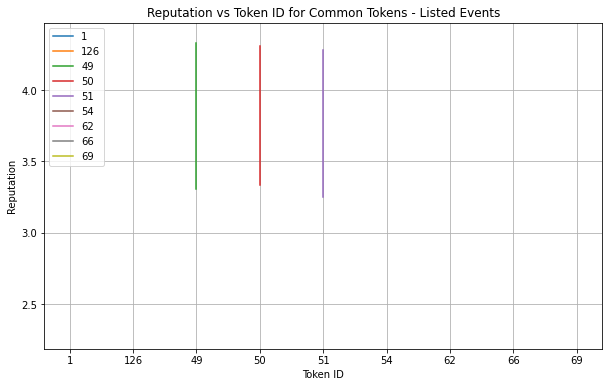

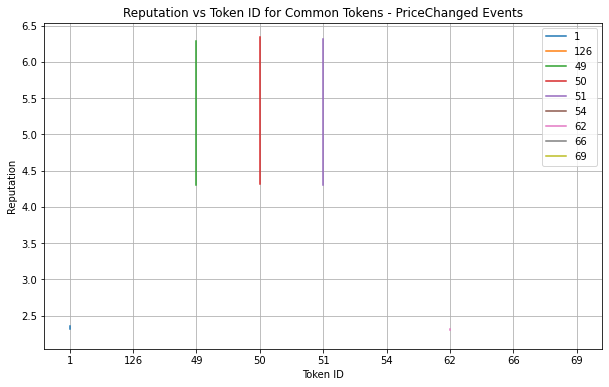


Data processing complete. CSV files saved.


In [15]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

# Plotting separate graphs for common token IDs between 'Listed' and 'PriceChange' events
common_token_ids_listed = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_listed = listed_df[listed_df['token_id'].isin(common_token_ids_listed)]

common_token_ids_price_changed = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_price_changed = price_changed_df[price_changed_df['token_id'].isin(common_token_ids_price_changed)]

# Plotting for Listed events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_listed.groupby('token_id'):
    plt.plot(group['token_id'], group['Reputation'], label=token_id)

plt.xlabel('Token ID')
plt.ylabel('Reputation')
plt.title('Reputation vs Token ID for Common Tokens - Listed Events')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for PriceChanged events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_price_changed.groupby('token_id'):
    plt.plot(group['token_id'], group['Reputation'], label=token_id)

plt.xlabel('Token ID')
plt.ylabel('Reputation')
plt.title('Reputation vs Token ID for Common Tokens - PriceChanged Events')
plt.legend()
plt.grid(True)
plt.show()

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   Rev Feedback |   amountInETH | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |              1 |          0.6  | Listed  |      2.3695  | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 |              1 |          0.3  | Listed  |      2.33462 | True          |
|          8 | 0x077

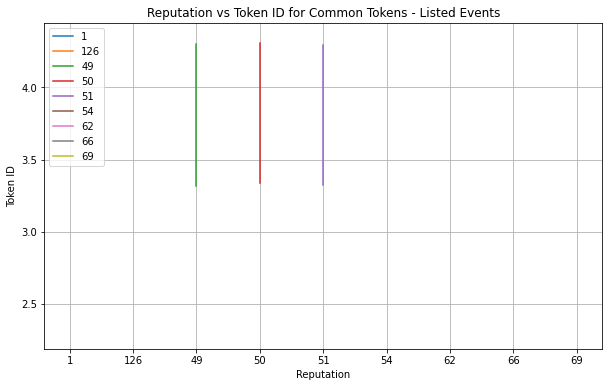

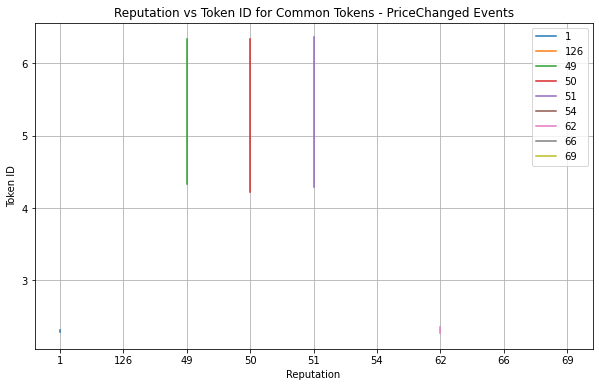


Data processing complete. CSV files saved.


In [13]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

# Plotting separate graphs for common token IDs between 'Listed' and 'PriceChange' events
common_token_ids_listed = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_listed = listed_df[listed_df['token_id'].isin(common_token_ids_listed)]

common_token_ids_price_changed = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_price_changed = price_changed_df[price_changed_df['token_id'].isin(common_token_ids_price_changed)]

# Plotting for Listed events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_listed.groupby('token_id'):
    plt.plot(group['token_id'], group['Reputation'], label=token_id)

plt.ylabel('Token ID')
plt.xlabel('Reputation')
plt.title('Reputation vs Token ID for Common Tokens - Listed Events')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for PriceChanged events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_price_changed.groupby('token_id'):
    plt.plot(group['token_id'], group['Reputation'], label=token_id)

plt.ylabel('Token ID')
plt.xlabel('Reputation')
plt.title('Reputation vs Token ID for Common Tokens - PriceChanged Events')
plt.legend()
plt.grid(True)
plt.show()

print("\nData processing complete. CSV files saved.")


Listed Events DataFrame:
+------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------+
|   token_id | creator                                    | is_sold   | owner                                      |   Rev Feedback |   amountInETH | event   |   Reputation | isFirstSale   |
|------------+--------------------------------------------+-----------+--------------------------------------------+----------------+---------------+---------+--------------+---------------|
|          1 | 0xf54a738c57506c393f235e89a2b8a7bbe2a8db25 | True      | 0xcda72070e455bb31c7690a170224ce43623d0b6f |              1 |          0.6  | Listed  |      2.36939 | True          |
|          7 | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 | True      | 0x077aca87f8ce2c3e7e1774e3ce4ff76939900cb0 |              1 |          0.3  | Listed  |      2.34071 | True          |
|          8 | 0x077

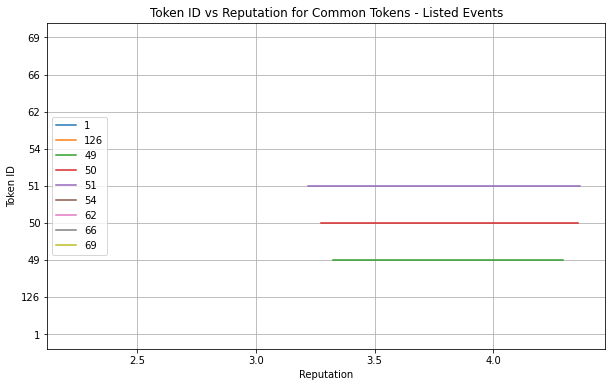

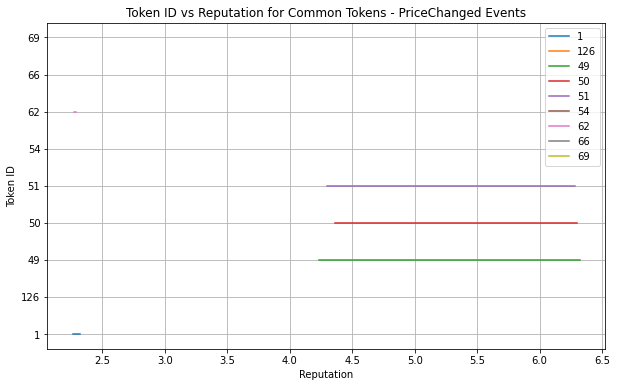


Data processing complete. CSV files saved.


In [12]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        # Ensure token_data is a dictionary before proceeding
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Save processed data to CSV files
listed_df.to_csv('Listed_events.csv', index=False)
price_changed_df.to_csv('Price_Changed_events.csv', index=False)

# Print the first 25 rows of each DataFrame in tabular format
print("Listed Events DataFrame:")
print(tabulate(listed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

print("\nPrice Changed Events DataFrame:")
print(tabulate(price_changed_df.head(25), headers='keys', tablefmt='psql', showindex=False))

# Plotting separate graphs for common token IDs between 'Listed' and 'PriceChange' events
common_token_ids_listed = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_listed = listed_df[listed_df['token_id'].isin(common_token_ids_listed)]

common_token_ids_price_changed = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_price_changed = price_changed_df[price_changed_df['token_id'].isin(common_token_ids_price_changed)]

# Plotting for Listed events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_listed.groupby('token_id'):
    plt.plot(group['Reputation'], [token_id] * len(group['Reputation']), label=token_id)

plt.xlabel('Reputation')
plt.ylabel('Token ID')
plt.title('Token ID vs Reputation for Common Tokens - Listed Events')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for PriceChanged events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_price_changed.groupby('token_id'):
    plt.plot(group['Reputation'], [token_id] * len(group['Reputation']), label=token_id)

plt.xlabel('Reputation')
plt.ylabel('Token ID')
plt.title('Token ID vs Reputation for Common Tokens - PriceChanged Events')
plt.legend()
plt.grid(True)
plt.show()

print("\nData processing complete. CSV files saved.")


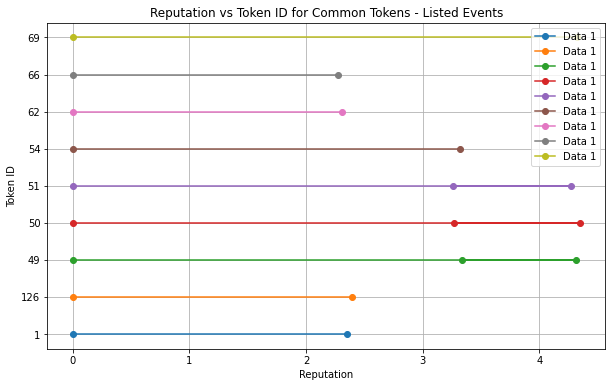

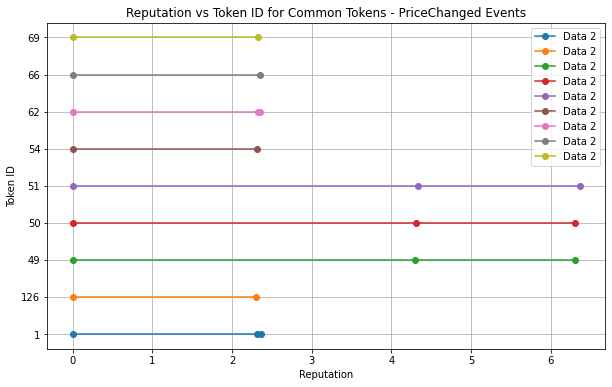


Data processing complete.


In [11]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Filter the common token IDs for both 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_listed = listed_df[listed_df['token_id'].isin(common_token_ids)]
common_data_price_changed = price_changed_df[price_changed_df['token_id'].isin(common_token_ids)]

# Plotting for Listed events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_listed.groupby('token_id'):
    plt.plot([0] + group['Reputation'].tolist(), [token_id] * (len(group['Reputation']) + 1), label='Data 1', marker='o')

plt.xlabel('Reputation')
plt.ylabel('Token ID')
plt.title('Reputation vs Token ID for Common Tokens - Listed Events')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for PriceChanged events
plt.figure(figsize=(10, 6))
for token_id, group in common_data_price_changed.groupby('token_id'):
    plt.plot([0] + group['Reputation'].tolist(), [token_id] * (len(group['Reputation']) + 1), label='Data 2', marker='o')

plt.xlabel('Reputation')
plt.ylabel('Token ID')
plt.title('Reputation vs Token ID for Common Tokens - PriceChanged Events')
plt.legend()
plt.grid(True)
plt.show()

print("\nData processing complete.")


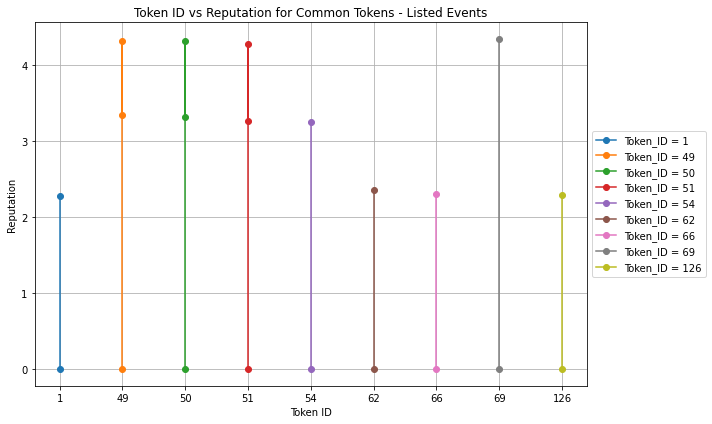

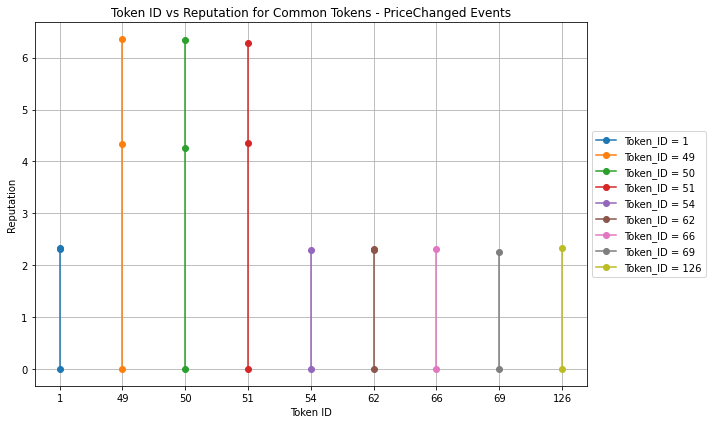


Data processing complete.


In [10]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Filter the common token IDs for both 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))
common_data_listed = listed_df[listed_df['token_id'].isin(common_token_ids)]
common_data_price_changed = price_changed_df[price_changed_df['token_id'].isin(common_token_ids)]

# Function to sort token ids and ensure 126 is last if it exists
def sorted_token_ids(token_ids):
    token_ids = sorted(token_ids)
    if '126' in token_ids:
        token_ids.append(token_ids.pop(token_ids.index('126')))
    return token_ids

# Plotting for Listed events
plt.figure(figsize=(10, 6))
for token_id in sorted_token_ids(common_data_listed['token_id'].unique()):
    group = common_data_listed[common_data_listed['token_id'] == token_id]
    plt.plot([token_id] * (len(group['Reputation']) + 1), [0] + group['Reputation'].tolist(), label=f'Token_ID = {token_id}', marker='o')

plt.ylabel('Reputation')
plt.xlabel('Token ID')
plt.title('Token ID vs Reputation for Common Tokens - Listed Events')
# Place the legend outside the plot to the right, with no overlap
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

# Plotting for PriceChanged events
plt.figure(figsize=(10, 6))
for token_id in sorted_token_ids(common_data_price_changed['token_id'].unique()):
    group = common_data_price_changed[common_data_price_changed['token_id'] == token_id]
    plt.plot([token_id] * (len(group['Reputation']) + 1), [0] + group['Reputation'].tolist(), label=f'Token_ID = {token_id}', marker='o')

plt.ylabel('Reputation')
plt.xlabel('Token ID')
plt.title('Token ID vs Reputation for Common Tokens - PriceChanged Events')
# Place the legend outside the plot to the right, with no overlap
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

print("\nData processing complete.")

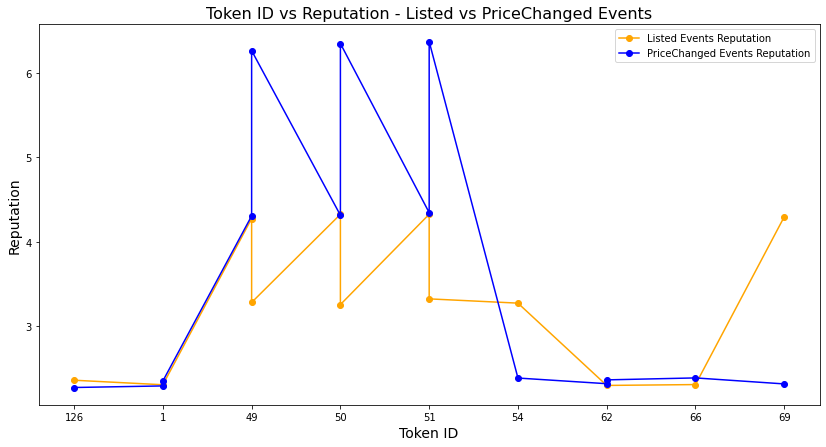


Data processing complete.


In [9]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Filter the common token IDs for both 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))

# Function to sort token ids and ensure 126 is last if it exists
def sorted_token_ids(token_ids):
    token_ids = sorted(token_ids, key=lambda x: (x != '126', x))
    return token_ids

# Extracting sorted token IDs for plotting
sorted_tokens = sorted_token_ids(common_token_ids)

# Filter the events data based on the sorted token IDs
sorted_listed_events = listed_df[listed_df['token_id'].isin(sorted_tokens)].sort_values(by='token_id', key=lambda x: x.map(lambda y: (y != '126', y)))
sorted_price_changed_events = price_changed_df[price_changed_df['token_id'].isin(sorted_tokens)].sort_values(by='token_id', key=lambda x: x.map(lambda y: (y != '126', y)))

# Start plotting
plt.figure(figsize=(14, 7))

# Plot 'Listed' events
plt.plot(sorted_listed_events['token_id'], sorted_listed_events['Reputation'], label='Listed Events Reputation', color='orange', marker='o')

# Plot 'PriceChanged' events
plt.plot(sorted_price_changed_events['token_id'], sorted_price_changed_events['Reputation'], label='PriceChanged Events Reputation', color='blue', marker='o')

# Add title and labels
plt.title('Token ID vs Reputation - Listed vs PriceChanged Events', fontsize=16)
plt.xlabel('Token ID', fontsize=14)
plt.ylabel('Reputation', fontsize=14)
plt.legend()

# Display the plot
plt.show()

print("\nData processing complete.")


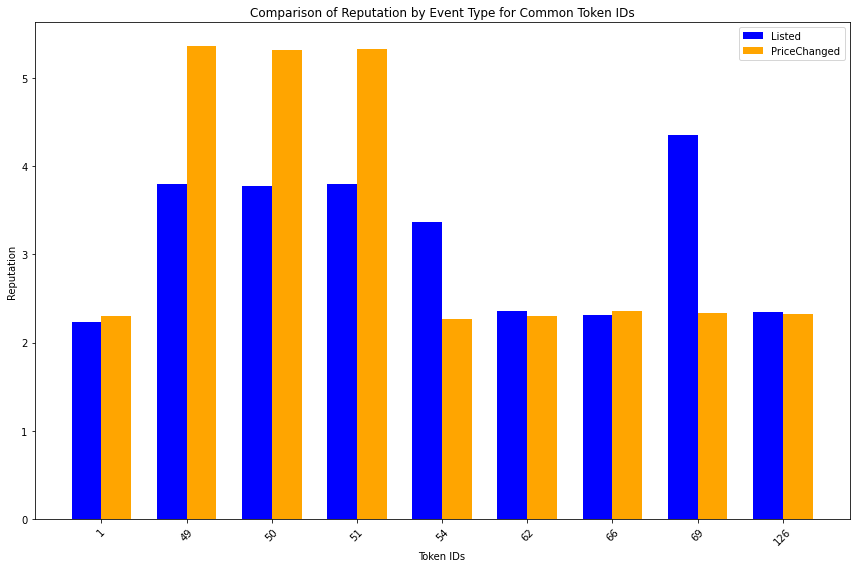

In [8]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Determine common token IDs between 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))

# Sort token IDs, placing '126' last
sorted_common_token_ids = sorted(common_token_ids, key=lambda x: (int(x) if x != '126' else float('inf')))

# Filter events to include only the common token IDs
listed_df_common = listed_df[listed_df['token_id'].isin(common_token_ids)]
price_changed_df_common = price_changed_df[price_changed_df['token_id'].isin(common_token_ids)]

# Calculate the mean reputation for the common token IDs for both event types
listed_reputations_common = listed_df_common.groupby('token_id')['Reputation'].mean().reindex(sorted_common_token_ids).fillna(0)
price_changed_reputations_common = price_changed_df_common.groupby('token_id')['Reputation'].mean().reindex(sorted_common_token_ids).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars
indices = range(len(sorted_common_token_ids))
listed_positions = [index - bar_width/2 for index in indices]
price_changed_positions = [index + bar_width/2 for index in indices]

# Plot the bars
ax.bar(listed_positions, listed_reputations_common, bar_width, label='Listed', color='blue')
ax.bar(price_changed_positions, price_changed_reputations_common, bar_width, label='PriceChanged', color='orange')

# Set the x-axis labels to be the token IDs, aligning them in the center of the grouped bars
ax.set_xticks(indices)
ax.set_xticklabels(sorted_common_token_ids, rotation=45)
ax.set_xlabel('Token IDs')
ax.set_ylabel('Reputation')
ax.set_title('Comparison of Reputation by Event Type for Common Token IDs')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

/home/suman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:171: UserWarning: FixedFormatter should only be used together with FixedLocator


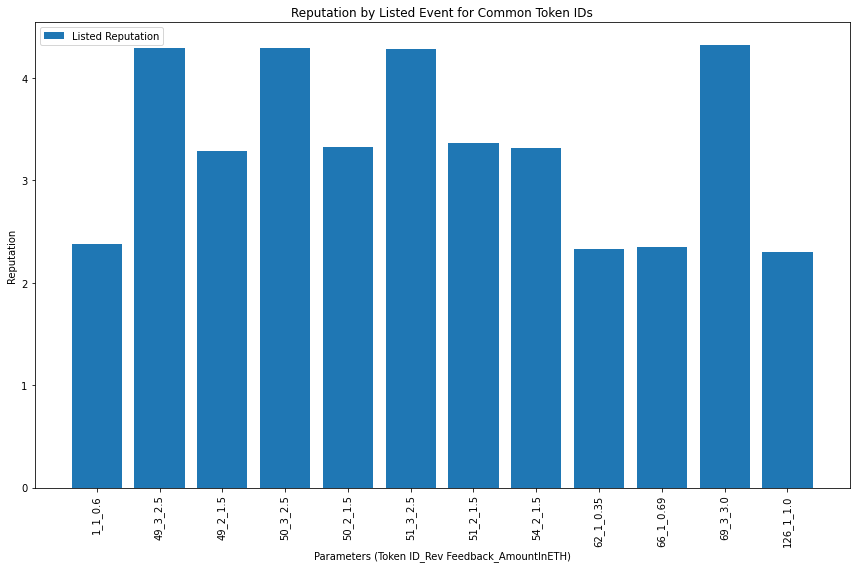

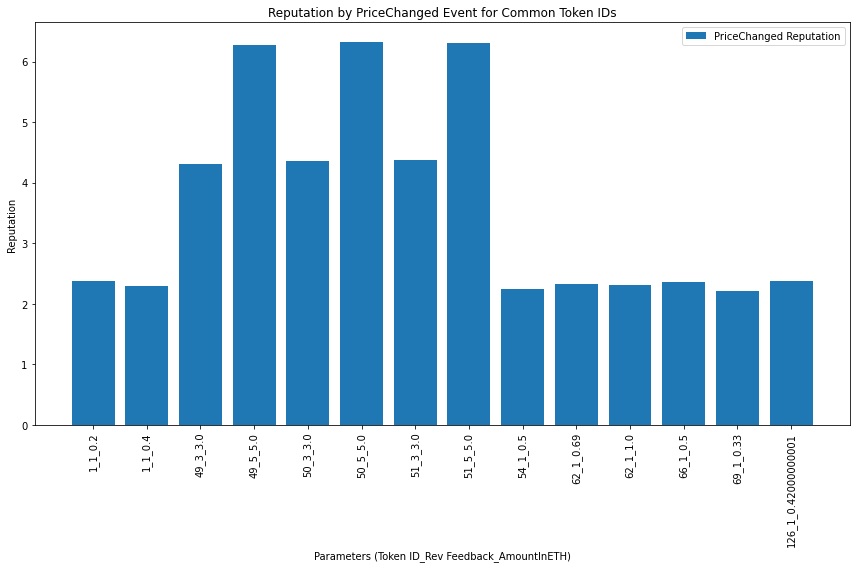

In [7]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Replace with your actual JSON data loading logic
# For demonstration, let's assume 'data' is a dictionary containing your JSON data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert events to DataFrames
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Determine common token IDs between 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))

# Filter events to only include common token IDs
listed_common = listed_df[listed_df['token_id'].isin(common_token_ids)].copy()
price_changed_common = price_changed_df[price_changed_df['token_id'].isin(common_token_ids)].copy()

# Sort token IDs, excluding '126' until the end
sorted_token_ids = sorted(common_token_ids, key=lambda x: (int(x) if x != '126' else float('inf')))

# Define a function to create the plots
def create_event_plot(event_df, event_name):
    # Combine 'token_id', 'Rev Feedback', and 'amountInETH' into a single string
    event_df['x_axis_label'] = event_df['token_id'].astype(str) + '_' + \
                               event_df['Rev Feedback'].astype(str) + '_' + \
                               event_df['amountInETH'].astype(str)
    
    # Sort the DataFrame based on our custom sorting for token_id
    event_df['sort_key'] = event_df['token_id'].apply(lambda x: (int(x) if x != '126' else float('inf')))
    event_df_sorted = event_df.sort_values('sort_key')
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.bar(event_df_sorted['x_axis_label'], event_df_sorted['Reputation'], label=f'{event_name} Reputation')

    # Add title and labels
    ax.set_xlabel('Parameters (Token ID_Rev Feedback_AmountInETH)')
    ax.set_ylabel('Reputation')
    ax.set_title(f'Reputation by {event_name} Event for Common Token IDs')
    ax.set_xticklabels(event_df_sorted['x_axis_label'], rotation=90)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Create the plot for the 'Listed' event
create_event_plot(listed_common, 'Listed')

# Create the plot for the 'PriceChanged' event
create_event_plot(price_changed_common, 'PriceChanged')

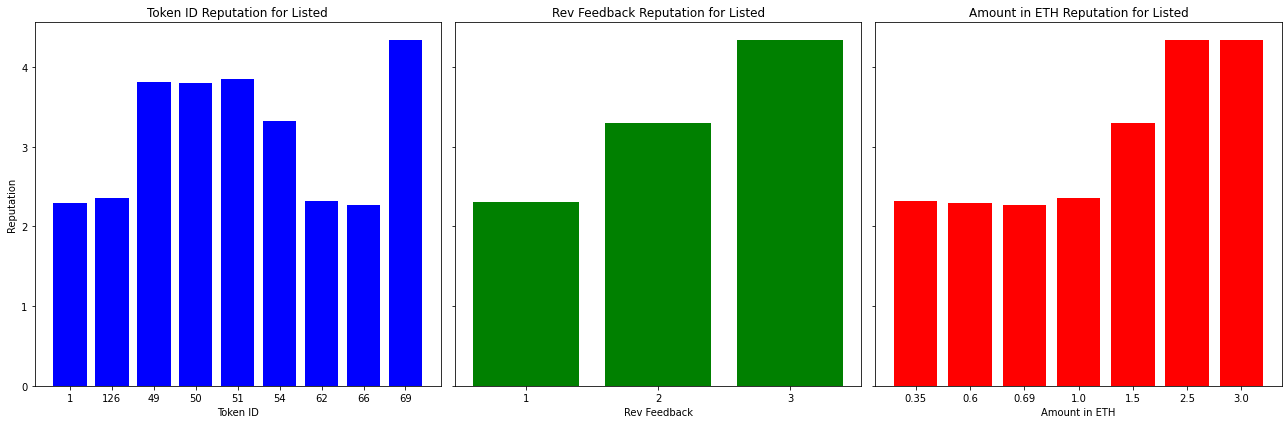

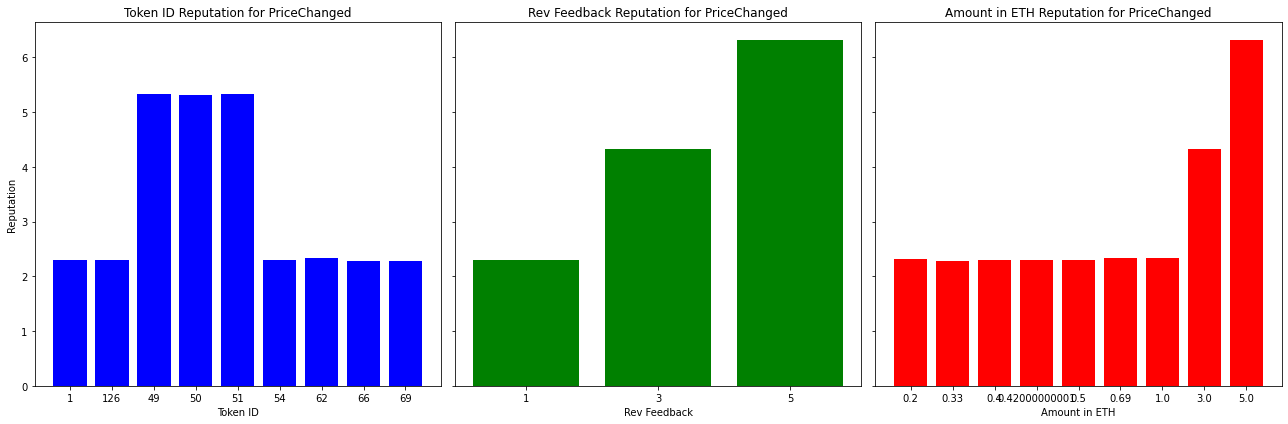

In [6]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Replace with your actual JSON data loading logic
# For demonstration, let's assume 'data' is a dictionary containing your JSON data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert events to DataFrames
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Determine common token IDs between 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))

# Function to create bar charts for each parameter against reputation
def create_parameter_charts(events_df, event_type):
    # Filter events to only include common token IDs
    common_events_df = events_df[events_df['token_id'].isin(common_token_ids)].copy()

    # Calculate the mean reputation for each parameter
    token_id_reputation = common_events_df.groupby('token_id')['Reputation'].mean()
    rev_feedback_reputation = common_events_df.groupby('Rev Feedback')['Reputation'].mean()
    amount_in_eth_reputation = common_events_df.groupby('amountInETH')['Reputation'].mean()

    # Create bar charts
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

    axes[0].bar(token_id_reputation.index.astype(str), token_id_reputation.values, color='blue')
    axes[0].set_title(f'Token ID Reputation for {event_type}')
    axes[0].set_xlabel('Token ID')
    axes[0].set_ylabel('Reputation')

    axes[1].bar(rev_feedback_reputation.index.astype(str), rev_feedback_reputation.values, color='green')
    axes[1].set_title(f'Rev Feedback Reputation for {event_type}')
    axes[1].set_xlabel('Rev Feedback')

    axes[2].bar(amount_in_eth_reputation.index.astype(str), amount_in_eth_reputation.values, color='red')
    axes[2].set_title(f'Amount in ETH Reputation for {event_type}')
    axes[2].set_xlabel('Amount in ETH')

    plt.tight_layout()
    plt.show()

# Create bar charts for 'Listed' event
create_parameter_charts(listed_df, 'Listed')

# Create bar charts for 'PriceChanged' event
create_parameter_charts(price_changed_df, 'PriceChanged')

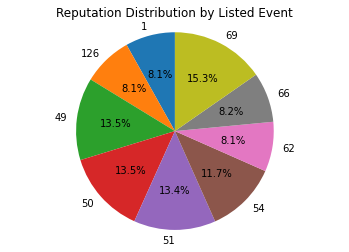

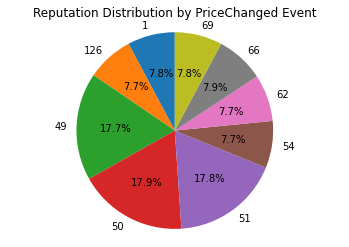

In [5]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Replace with your actual JSON data loading logic
# For demonstration, let's assume 'data' is a dictionary containing your JSON data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Define your create_graph_from_data, calculate_reputation_for_event, process_events functions here

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert events to DataFrames
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Determine common token IDs between 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(price_changed_df['token_id'])

# Define a function to create pie charts for each event type
def create_event_pie_chart(events_df, event_type):
    # Filter events to only include common token IDs
    common_events_df = events_df[events_df['token_id'].isin(common_token_ids)].copy()

    # Calculate the mean reputation for each token_id
    token_id_reputation = common_events_df.groupby('token_id')['Reputation'].mean()

    # Plot
    fig, ax = plt.subplots()
    ax.pie(token_id_reputation, labels=token_id_reputation.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add a title
    plt.title(f'Reputation Distribution by {event_type} Event')
    plt.show()

# Create the pie chart for the 'Listed' event
create_event_pie_chart(listed_df, 'Listed')

# Create the pie chart for the 'PriceChanged' event
create_event_pie_chart(price_changed_df, 'PriceChanged')

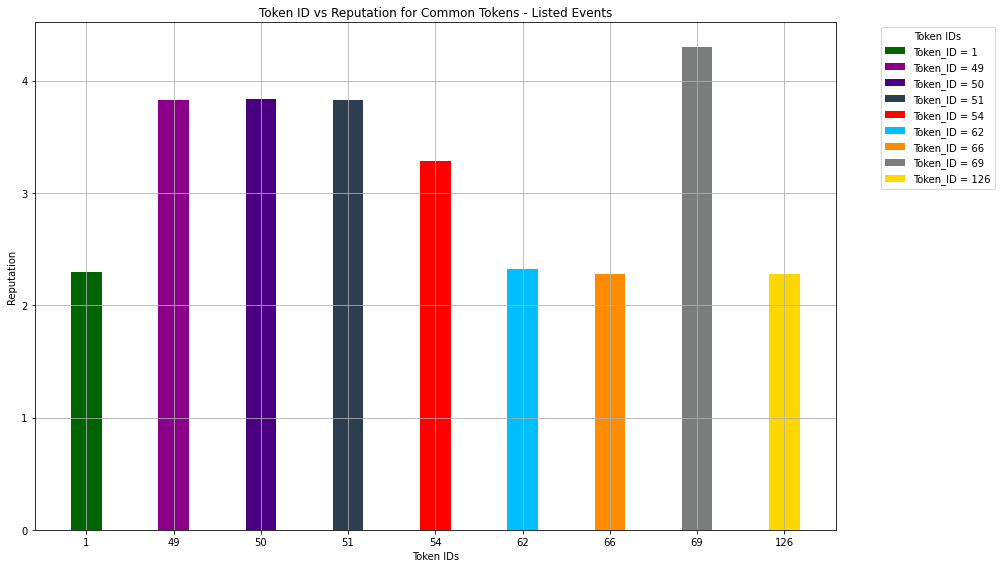

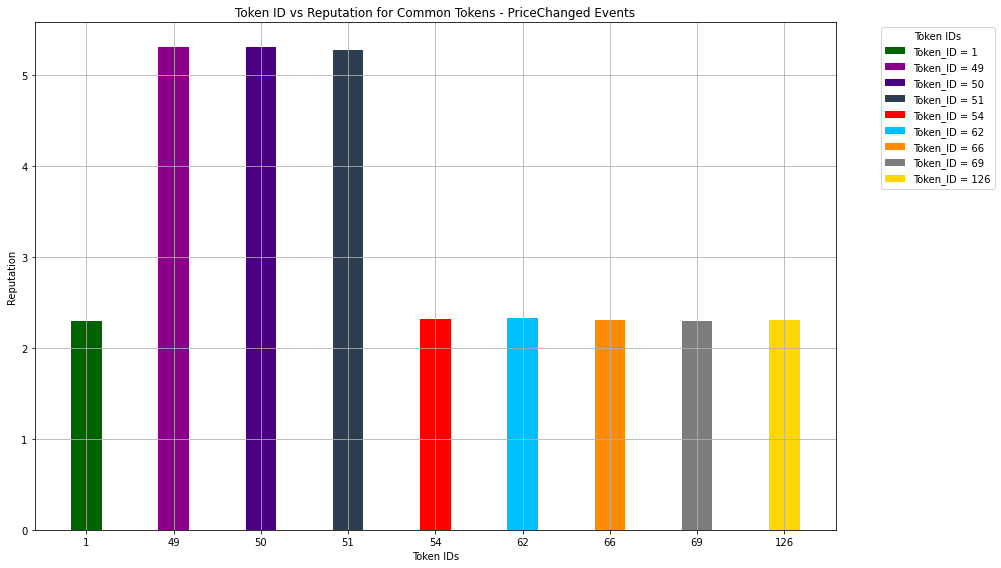


Data processing complete.


In [3]:
import json
import pandas as pd
import networkx as nx
from Trust.hitting_time import BL_PHT
from Trust.random_walks import RandomWalks
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

def create_graph_from_data(data):
    G = nx.Graph()
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            token_id = token_data.get('tokenId')
            creator_info = token_data.get('creator')
            owner_info = token_data.get('owner')
            creator_id = creator_info.get('id') if creator_info else None
            owner_id = owner_info.get('id') if owner_info else None
            if creator_id and token_id:
                G.add_edge(creator_id, token_id, type='creator')
            if owner_id and token_id:
                G.add_edge(owner_id, token_id, type='owner')
    return G

def calculate_reputation_for_event(graph, event, token_data):
    token_id = token_data.get('tokenId')
    creator_info = token_data.get('creator')
    owner_info = token_data.get('owner')
    
    creator_id = creator_info.get('id') if creator_info else None
    owner_id = owner_info.get('id') if owner_info else None
    amount_in_eth = event.get('amountInETH', 0)
    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)

    if not all([token_id, creator_id, owner_id]):
        return 0

    bl_pht = BL_PHT(graph, seed_node=token_id)
    reputation_scores = bl_pht.compute_reputation_scores()

    creator_reputation = reputation_scores.get(creator_id, 0)
    owner_reputation = reputation_scores.get(owner_id, 0)
    total_reputation = (creator_reputation + owner_reputation)

    return total_reputation

def process_events(data, graph):
    listed_events = []
    price_changed_events = []
    listed_is_sold_status = {}

    # Capture isFirstSale status from 'Listed' events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                if event.get('event') == 'Listed':
                    token_id = token_data.get('tokenId')
                    is_sold = token_data.get('isFirstSale', False)
                    listed_is_sold_status[token_id] = is_sold

    # Process all events
    for _, token_data in data.items():
        if isinstance(token_data, dict):
            for event in token_data.get('nftHistory', []):
                event_type = event.get('event')
                token_id = token_data.get('tokenId')
                if event_type in ['Listed', 'PriceChanged']:
                    creator_info = token_data.get('creator')
                    owner_info = token_data.get('owner')
                    amount_in_eth = event.get('amountInETH', 0)
                    amount_in_eth = 0 if amount_in_eth is None else float(amount_in_eth)
                    creator_id = creator_info.get('id') if creator_info else None
                    owner_id = owner_info.get('id') if owner_info else None

                    # Replace 'Owner' with 'Creator ID' if it is '0x0000000000000000000000000000000000000000'
                    if owner_id == '0x0000000000000000000000000000000000000000':
                        owner_id = creator_id

                    if not all([token_id, creator_id, owner_id]):
                        continue

                    reputation = calculate_reputation_for_event(graph, event, token_data)

                    # Set is_sold and isFirstSale values based on logic
                    if event_type == 'PriceChanged':
                        is_sold = not listed_is_sold_status.get(token_id, True)  # Opposite of Listed event's is_sold
                        is_first_sale = is_sold
                    else:  # Listed event
                        is_sold = listed_is_sold_status.get(token_id, True)
                        is_first_sale = is_sold

                    # Calculate 'Rev Feedback' based on 'amountInETH' and reputation
                    if (amount_in_eth <= 1 and reputation <= 2):
                        rev_feedback = 1
                    elif (amount_in_eth <= 2 and reputation <= 3):
                        rev_feedback = 2
                    elif (amount_in_eth <= 3 and reputation <= 4):
                        rev_feedback = 3
                    elif (amount_in_eth <= 4 and reputation <= 5):
                        rev_feedback = 4
                    else:
                        rev_feedback = 5

                    # Calculate final reputation
                    final_reputation = reputation + rev_feedback

                    processed_event = {
                        'token_id': token_id,
                        'creator': creator_id,
                        'is_sold': is_sold,
                        'owner': owner_id,
                        'Rev Feedback': rev_feedback,
                        'amountInETH': amount_in_eth,
                        'event': event_type,
                        'Reputation': final_reputation,  # Updated column
                        'isFirstSale': is_first_sale
                        
                    }

                    if event_type == 'Listed':
                        listed_events.append(processed_event)
                    else:  # PriceChanged
                        price_changed_events.append(processed_event)

    return listed_events, price_changed_events

# Load the data
file_path = 'fixed_nft_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a graph from the data
graph = create_graph_from_data(data)

# Process the events
listed_events, price_changed_events = process_events(data, graph)

# Convert to DataFrame
listed_df = pd.DataFrame(listed_events)
price_changed_df = pd.DataFrame(price_changed_events)

# Filter the common token IDs for both 'Listed' and 'PriceChanged' events
common_token_ids = set(listed_df['token_id']).intersection(set(price_changed_df['token_id']))

# Function to sort token ids and ensure 126 is last if it exists
def sorted_token_ids(token_ids):
    token_ids = sorted(token_ids, key=lambda x: (int(x) if x != '126' else float('inf')))
    return token_ids

# Function to plot the bar chart for the given events
def plot_event_bars(df, event_type):
    sorted_ids = sorted_token_ids(df['token_id'].unique())

    # Define specific colors for tokens 49, 50, 54, 62, 66, and 126
    specific_colors = {
        '49': '#8B008B',  # DarkMagenta
        '50': '#4B0082',  # Indigo
        '54': '#FF0000',  # Red
        '62': '#00BFFF',  # DeepSkyBlue
        '66': '#FF8C00',  # DarkOrange
        '126': '#FFD700',  # Gold (dark yellow)
    }
    
    # Define a base set of colors
    base_colors = ['#006400', '#8B0000', '#2F4F4F', '#2C3E50', '#8E44AD', '#27AE60', '#34495E', '#7B7D7D']
    
    # Prepare figure and bar width
    plt.figure(figsize=(14, 8))
    bar_width = 0.35  # Set the width of each bar

    # Plot bars with specific colors for certain tokens or base colors for others
    for index, token_id in enumerate(sorted_ids):
        # Filter rows for each token_id and calculate the average reputation
        token_data = df[df['token_id'] == token_id]
        avg_reputation = token_data['Reputation'].mean()
        
        # Choose color: specific color for certain tokens, or base color for others
        color = specific_colors.get(token_id, base_colors[index % len(base_colors)])

        # Plot each bar
        plt.bar(index, avg_reputation, bar_width, label=f'Token_ID = {token_id}', color=color)

    plt.xlabel('Token IDs')
    plt.ylabel('Reputation')
    plt.title(f'Token ID vs Reputation for Common Tokens - {event_type} Events')

    # Place the legend outside the plot area
    plt.legend(title="Token IDs", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(range(len(sorted_ids)), sorted_ids)  # Set x-ticks to be token IDs
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the legend

    plt.show()

# Plot bar charts for 'Listed' events
plot_event_bars(listed_df[listed_df['token_id'].isin(common_token_ids)], 'Listed')

# Plot bar charts for 'PriceChanged' events
plot_event_bars(price_changed_df[price_changed_df['token_id'].isin(common_token_ids)], 'PriceChanged')

print("\nData processing complete.")